# 석식 식수 인원 예측


In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so


# statistics
import statsmodels.api as sm

# pandas options
pd.set_option("mode.copy_on_write", False) # pandas 2.0.0 이상
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 8

import sklearn

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

유희준씨가 친절히 한땀한땀 분류해준 train과 test를 사용합시다.

In [2]:
train = pd.read_csv("C:/Users/zezeg/Desktop/train1.csv")
test =  pd.read_csv("C:/Users/zezeg/Desktop/test.csv")

-----------------------------------------------------------

## 데이터 핥기

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [4]:
train.duplicated().sum()

# 중복 x

0

In [5]:
train.head(5)

# 날짜, 메뉴(텍스트 다루기), 출장과 휴가자, 재택 근무자 수 등으로 이루어져 있음

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.00,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.00,331.00
1,2016-02-02,화,2601,50,173,319,0.00,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.00,560.00
2,2016-02-03,수,2601,56,180,111,0.00,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.00,573.00
3,2016-02-04,목,2601,104,220,355,0.00,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.00,525.00
4,2016-02-05,금,2601,278,181,34,0.00,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.00,330.00


In [6]:
train.tail(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
1200,2021-01-20,수,2983,75,198,4,391.00,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.00,421.00
1201,2021-01-21,목,2983,92,231,462,351.00,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.00,353.00
1202,2021-01-22,금,2983,255,248,1,303.00,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.00,217.00
1203,2021-01-25,월,2983,107,153,616,327.00,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.00,502.00
1204,2021-01-26,화,2983,69,183,551,362.00,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.00,480.00


### 핥아보고 느낀점 간단히

1. 2016년부터 2021년 초 까지 약 5년간의 데이터(시계열?)


2. 일자에 연월일이 한번에 들어가 있으므로, 코로나 등으로 기업의 정원 수나 재택 근무자수의 변화가 있을 수 있음을 고려할 때 pandas 연도로 바꿔주면 좋을 듯 함.


3. 월화수목금 - 요일이 존재. 불금이나 월요일 고려.


4. 시간외 근무 명령?  보통 초과근무를 지칭한다고 함.


5. 재택근무자수 - (아마)코로나라는 변수로 인해 2020년 전후로 크게 변화할 것 같음.


6. 조식메뉴 - 중식 또는 석식 식수인원 예측에 의미가 있을지?


7. 중식/석식 메뉴 열 다루기 - 메인메뉴와 국만 뽑아볼까?

In [7]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00
mean,2807.82,157.91,241.14,274.12,43.51,890.33,461.77
std,171.26,144.19,43.53,246.24,109.94,209.51,139.18
min,2601.00,23.00,41.00,0.00,0.00,296.00,0.00
25%,2645.00,71.00,217.00,4.00,0.00,758.00,406.00
50%,2760.00,105.00,245.00,299.00,0.00,879.00,483.00
75%,2962.00,185.00,272.00,452.00,0.00,1032.00,545.00
max,3305.00,1224.00,378.00,1044.00,533.00,1459.00,905.00


재택근무자수가 눈에 띈다. 3q까지 0이다가 max는 533이므로, 5년동안 거의 없다가 특정 시기를 기점으로 팍 뛴 것으로 보임.

------------------------

## train & valid 분리

In [8]:
train1 = train.copy()

In [9]:
from sklearn.model_selection import train_test_split
train1, valid1 = train_test_split(train1, test_size=0.2, random_state=42) # valid set 15%

In [10]:
# 간단한 열 이름으로 수정
new_colname = ["일자", "요일", "정원", "휴가자수","출장자수","연장근무승인건수","본사재택근무자수","조식","중식","석식","중식계","석식계"]
train1.columns = new_colname
valid1.columns = new_colname

------------------

## EDA

### 1. 상관관계

석식과 연장근무 승인건수, 중식과 석식이 눈에 띄고

 이외 다양한 음의 상관관계가 보임

In [11]:
train1[["정원", "휴가자수","출장자수","연장근무승인건수","본사재택근무자수","중식계","석식계"]].corr()

,정원,휴가자수,출장자수,연장근무승인건수,본사재택근무자수,중식계,석식계
정원,1.00,0.24,-0.07,0.15,0.47,-0.11,-0.17
휴가자수,0.24,1.00,-0.26,-0.24,0.07,-0.40,-0.34
출장자수,-0.07,-0.26,1.00,-0.32,-0.36,-0.52,-0.19
연장근무승인건수,0.15,-0.24,-0.32,1.00,0.15,0.54,0.57
본사재택근무자수,0.47,0.07,-0.36,0.15,1.00,0.07,-0.05
중식계,-0.11,-0.40,-0.52,0.54,0.07,1.00,0.51
석식계,-0.17,-0.34,-0.19,0.57,-0.05,0.51,1.00


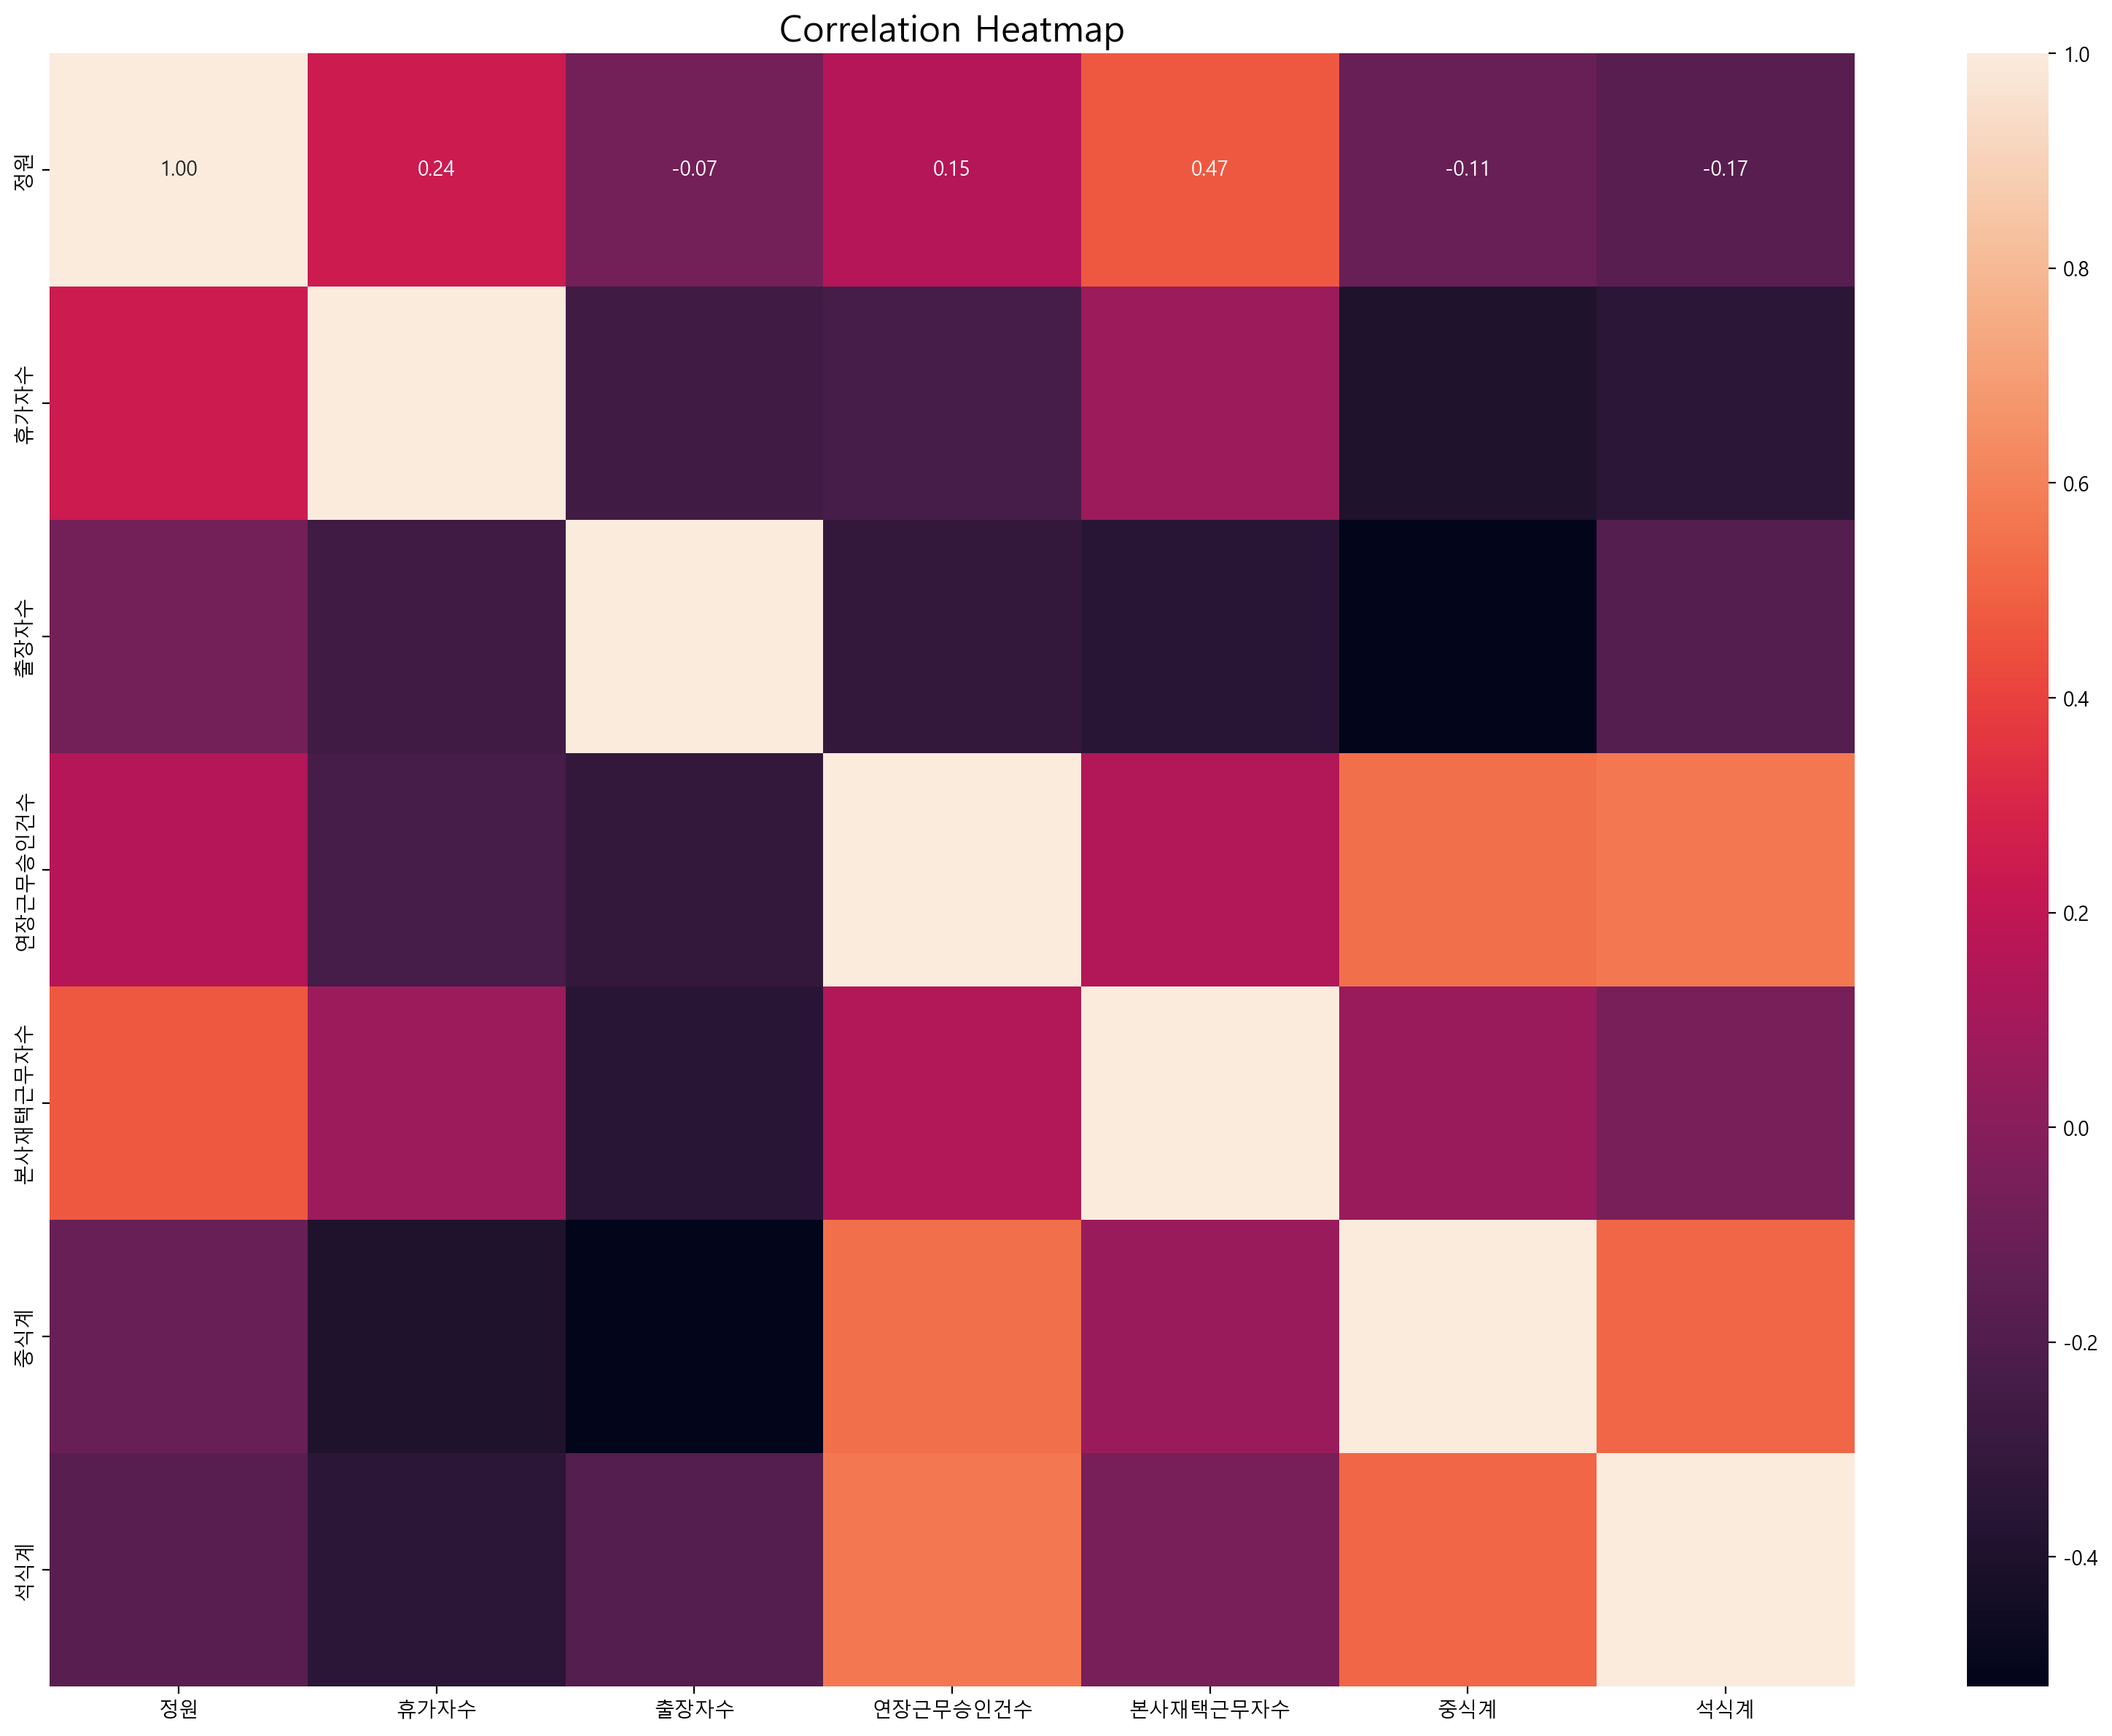

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  

# 히트맵 생성
plt.figure(figsize=(16, 12))
sns.heatmap(
    train1[["정원", "휴가자수", "출장자수", "연장근무승인건수", "본사재택근무자수", "중식계", "석식계"]].corr(), 
    annot=True, 
    fmt=".2f",  
    cbar=True,  
    annot_kws={"size": 10},
)
plt.title('Correlation Heatmap', fontsize=18)
plt.tight_layout()  
plt.show()


### 2. 박스플랏 분석

c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

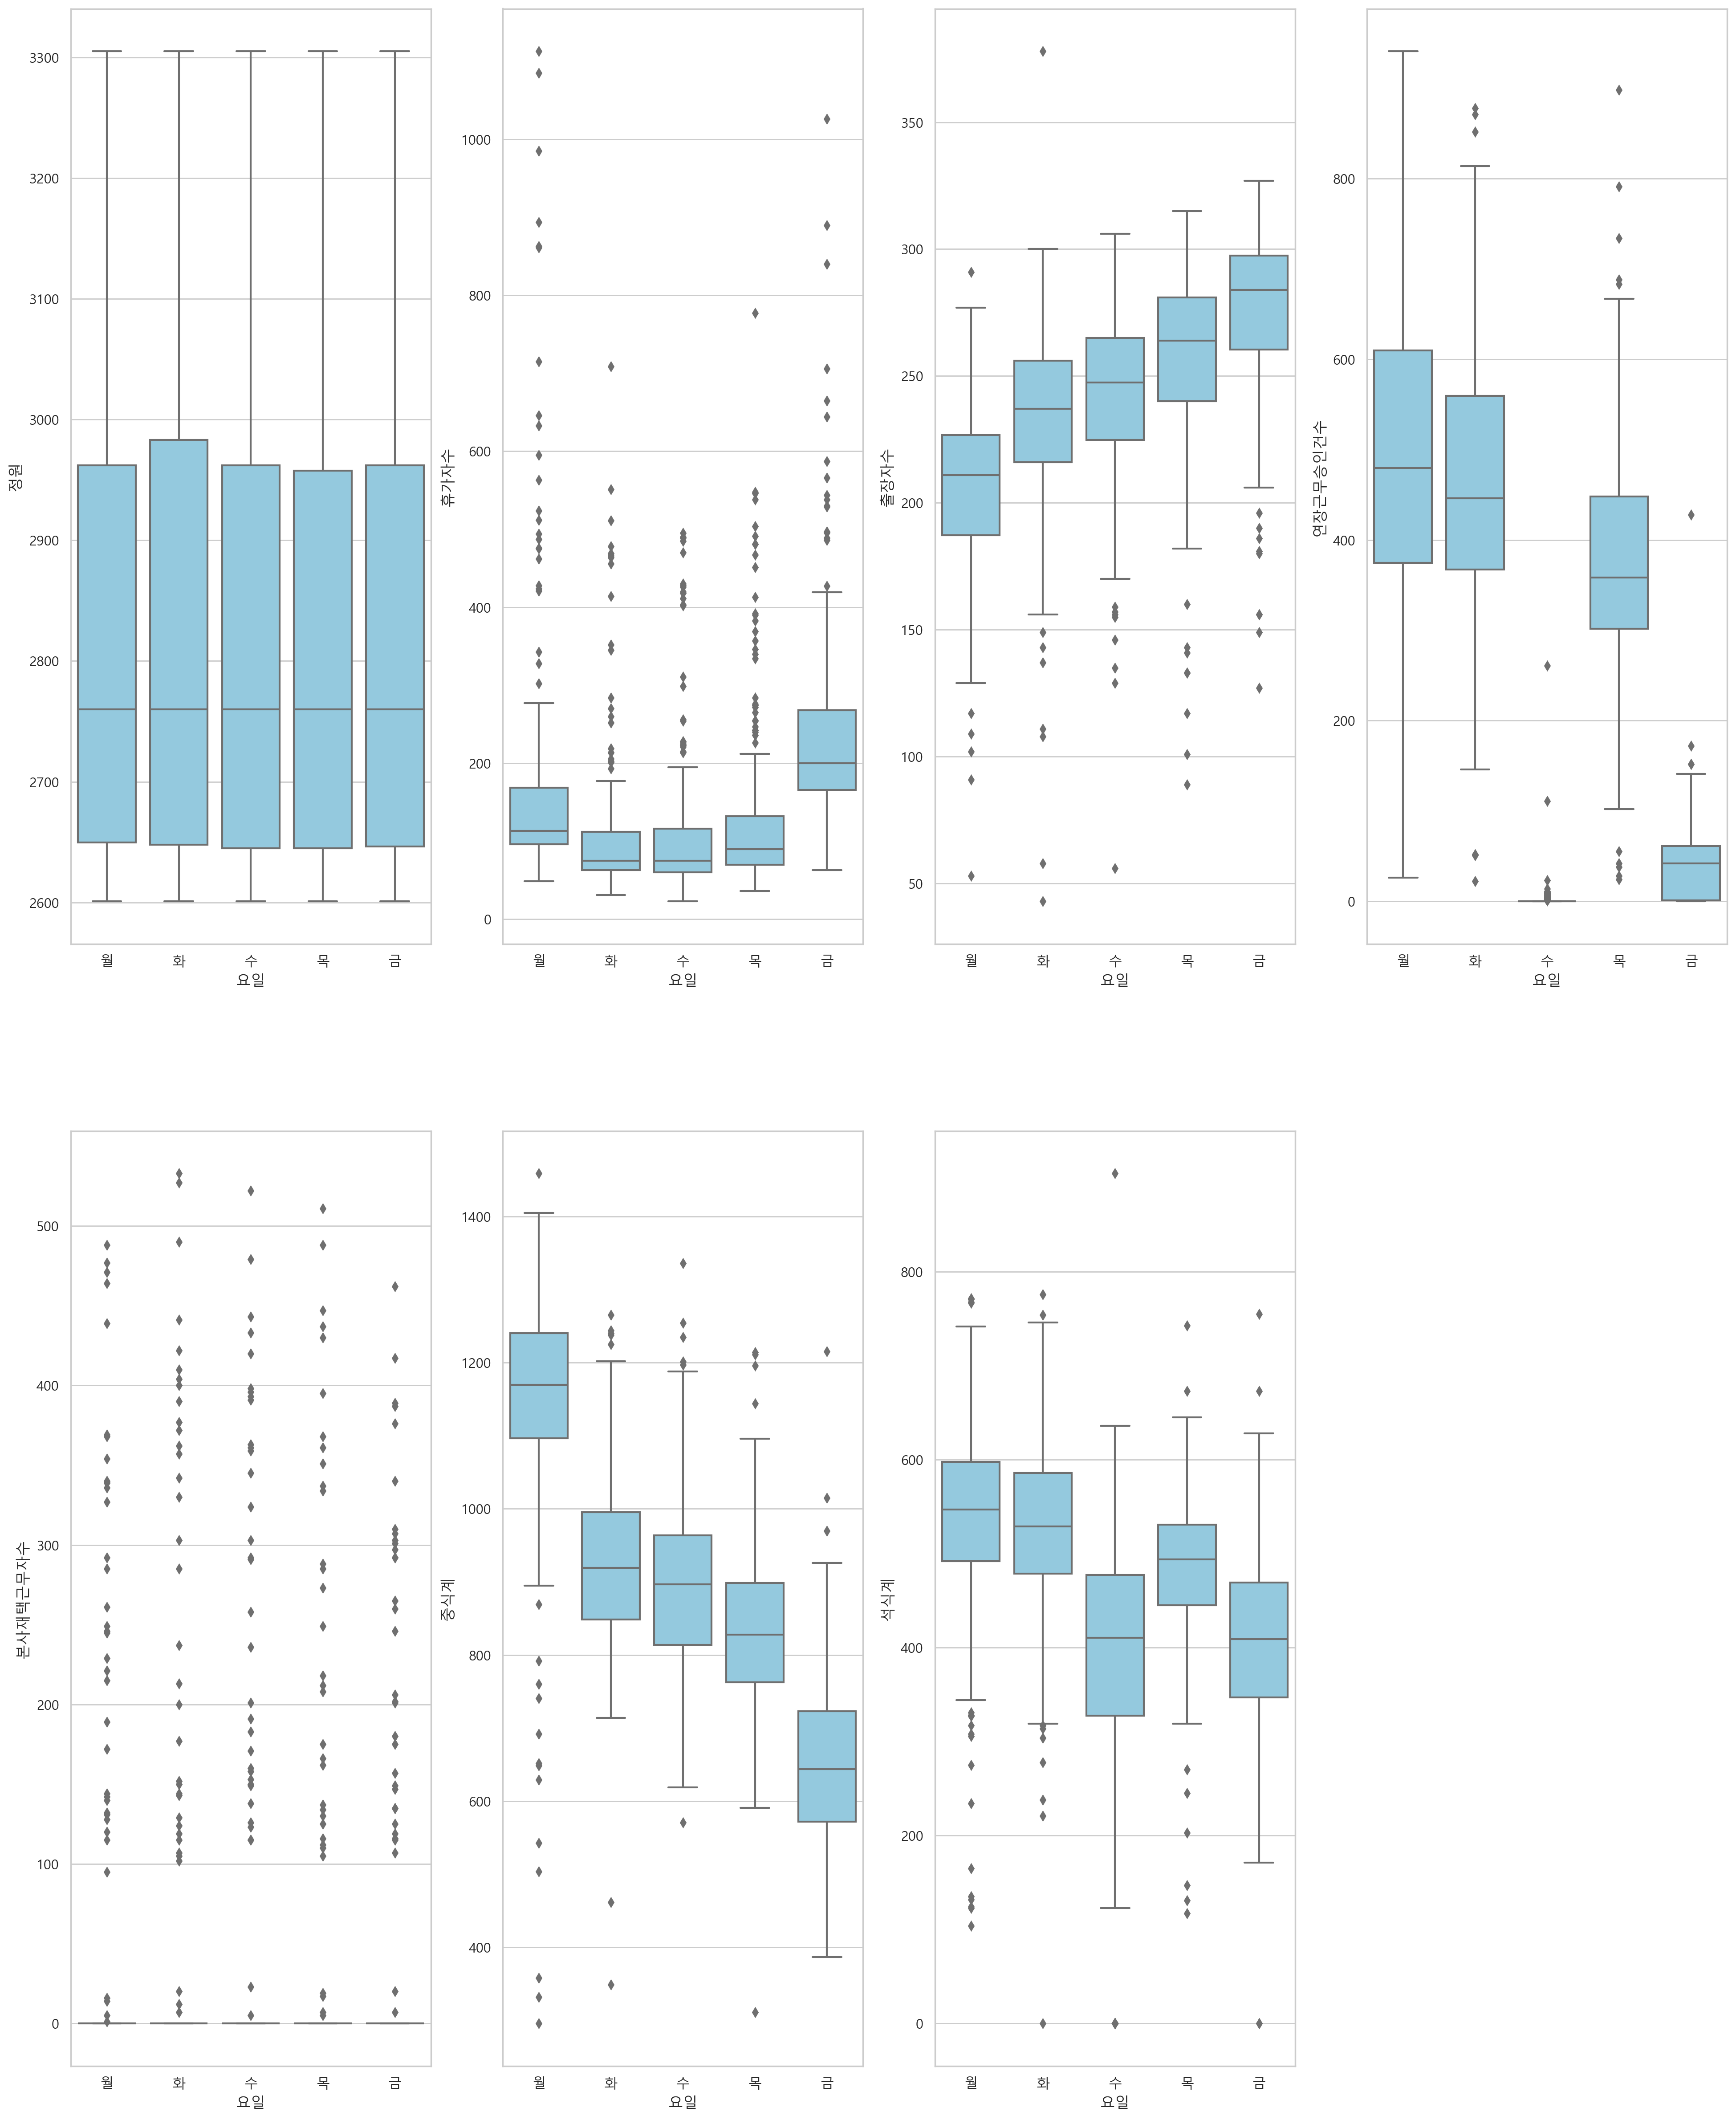

In [13]:
from pandas.api.types import CategoricalDtype

# 요일 순서 설정
weekday_order = ['월', '화', '수', '목', '금']
train1['요일'] = train1['요일'].astype(CategoricalDtype(categories=weekday_order, ordered=True))

# 아직 일자를 분리하기 전이니, 가장 간단한 요일 중심으로 각 열 시각화
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
fig, ax1 = plt.subplots(2, 4, figsize=(24, 30))
columns = ["정원","휴가자수","출장자수","연장근무승인건수","본사재택근무자수","중식계","석식계"]

k = 0
for i in range(2):
    for j in range(4):
        if k < len(columns):
            sns.boxplot(x='요일', y=columns[k], data=train1, ax=ax1[i][j], color='skyblue')
        else:
            ax1[i][j].axis('off')  # 인덱스를 초과하면 빈 플롯으로 남겨둠
        k += 1
plt.show()


----------------------------------------
간단한 요일별 박스플랏 분석 결과

 1. 다양한 시간대별 피쳐 탐색 필요성.

  - **본사 재택 근무자수**를 보면, 요일로는 분석의 의미가 없음을 알 수 있음.

  - **출장자수**(요일별로 늘어나는 패턴이 존재)나 연장근무자수(수요일 한정 0)는 **요일별 feature**로 예상됨.

  - **휴가자수**의 경우, 여름철이나 연말같은 **월별/계절별 feature**로 예상됨.

  - 계절적 특성이나, 요일, 연도까지 각 피쳐를 시간별로 더 세분화하여 들어가야 할듯.

 2.
  - 각 피쳐를 어떤 시간을 기준으로 살펴보는지에 따라 이상치인지 아닌지가 달라질 수 있을 것 같음. 



 3. 

 - 이상치를 단순히 이전처럼 피쳐별 단순평균으로 일괄 대체하기에는 고려해야 할 사항이 매우 많아 보임.
 - 그러니 일자를 분해하여 eda 도구로 써보자.

-----------------

이후부터는 각 변환시마다 VALID에도 같은 방식(TRAIN 변환을 그대로 적용)의 변환을 가해주겠다.

In [14]:
# 본격 탐색 전 일자를 판다스 연도 객체로 변환

train1['일자'] = pd.to_datetime(train1['일자'])


# 연도와 월을 각각 추출하여 train1 데이터프레임에 추가
train1['연'] = train1['일자'].dt.year
train1['월'] = train1['일자'].dt.month
train1['일'] = train1['일자'].dt.day




# valid도 같은 변환

valid1['일자'] = pd.to_datetime(valid1['일자'])

valid1['연'] = valid1['일자'].dt.year
valid1['월'] = valid1['일자'].dt.month
valid1['일'] = valid1['일자'].dt.day

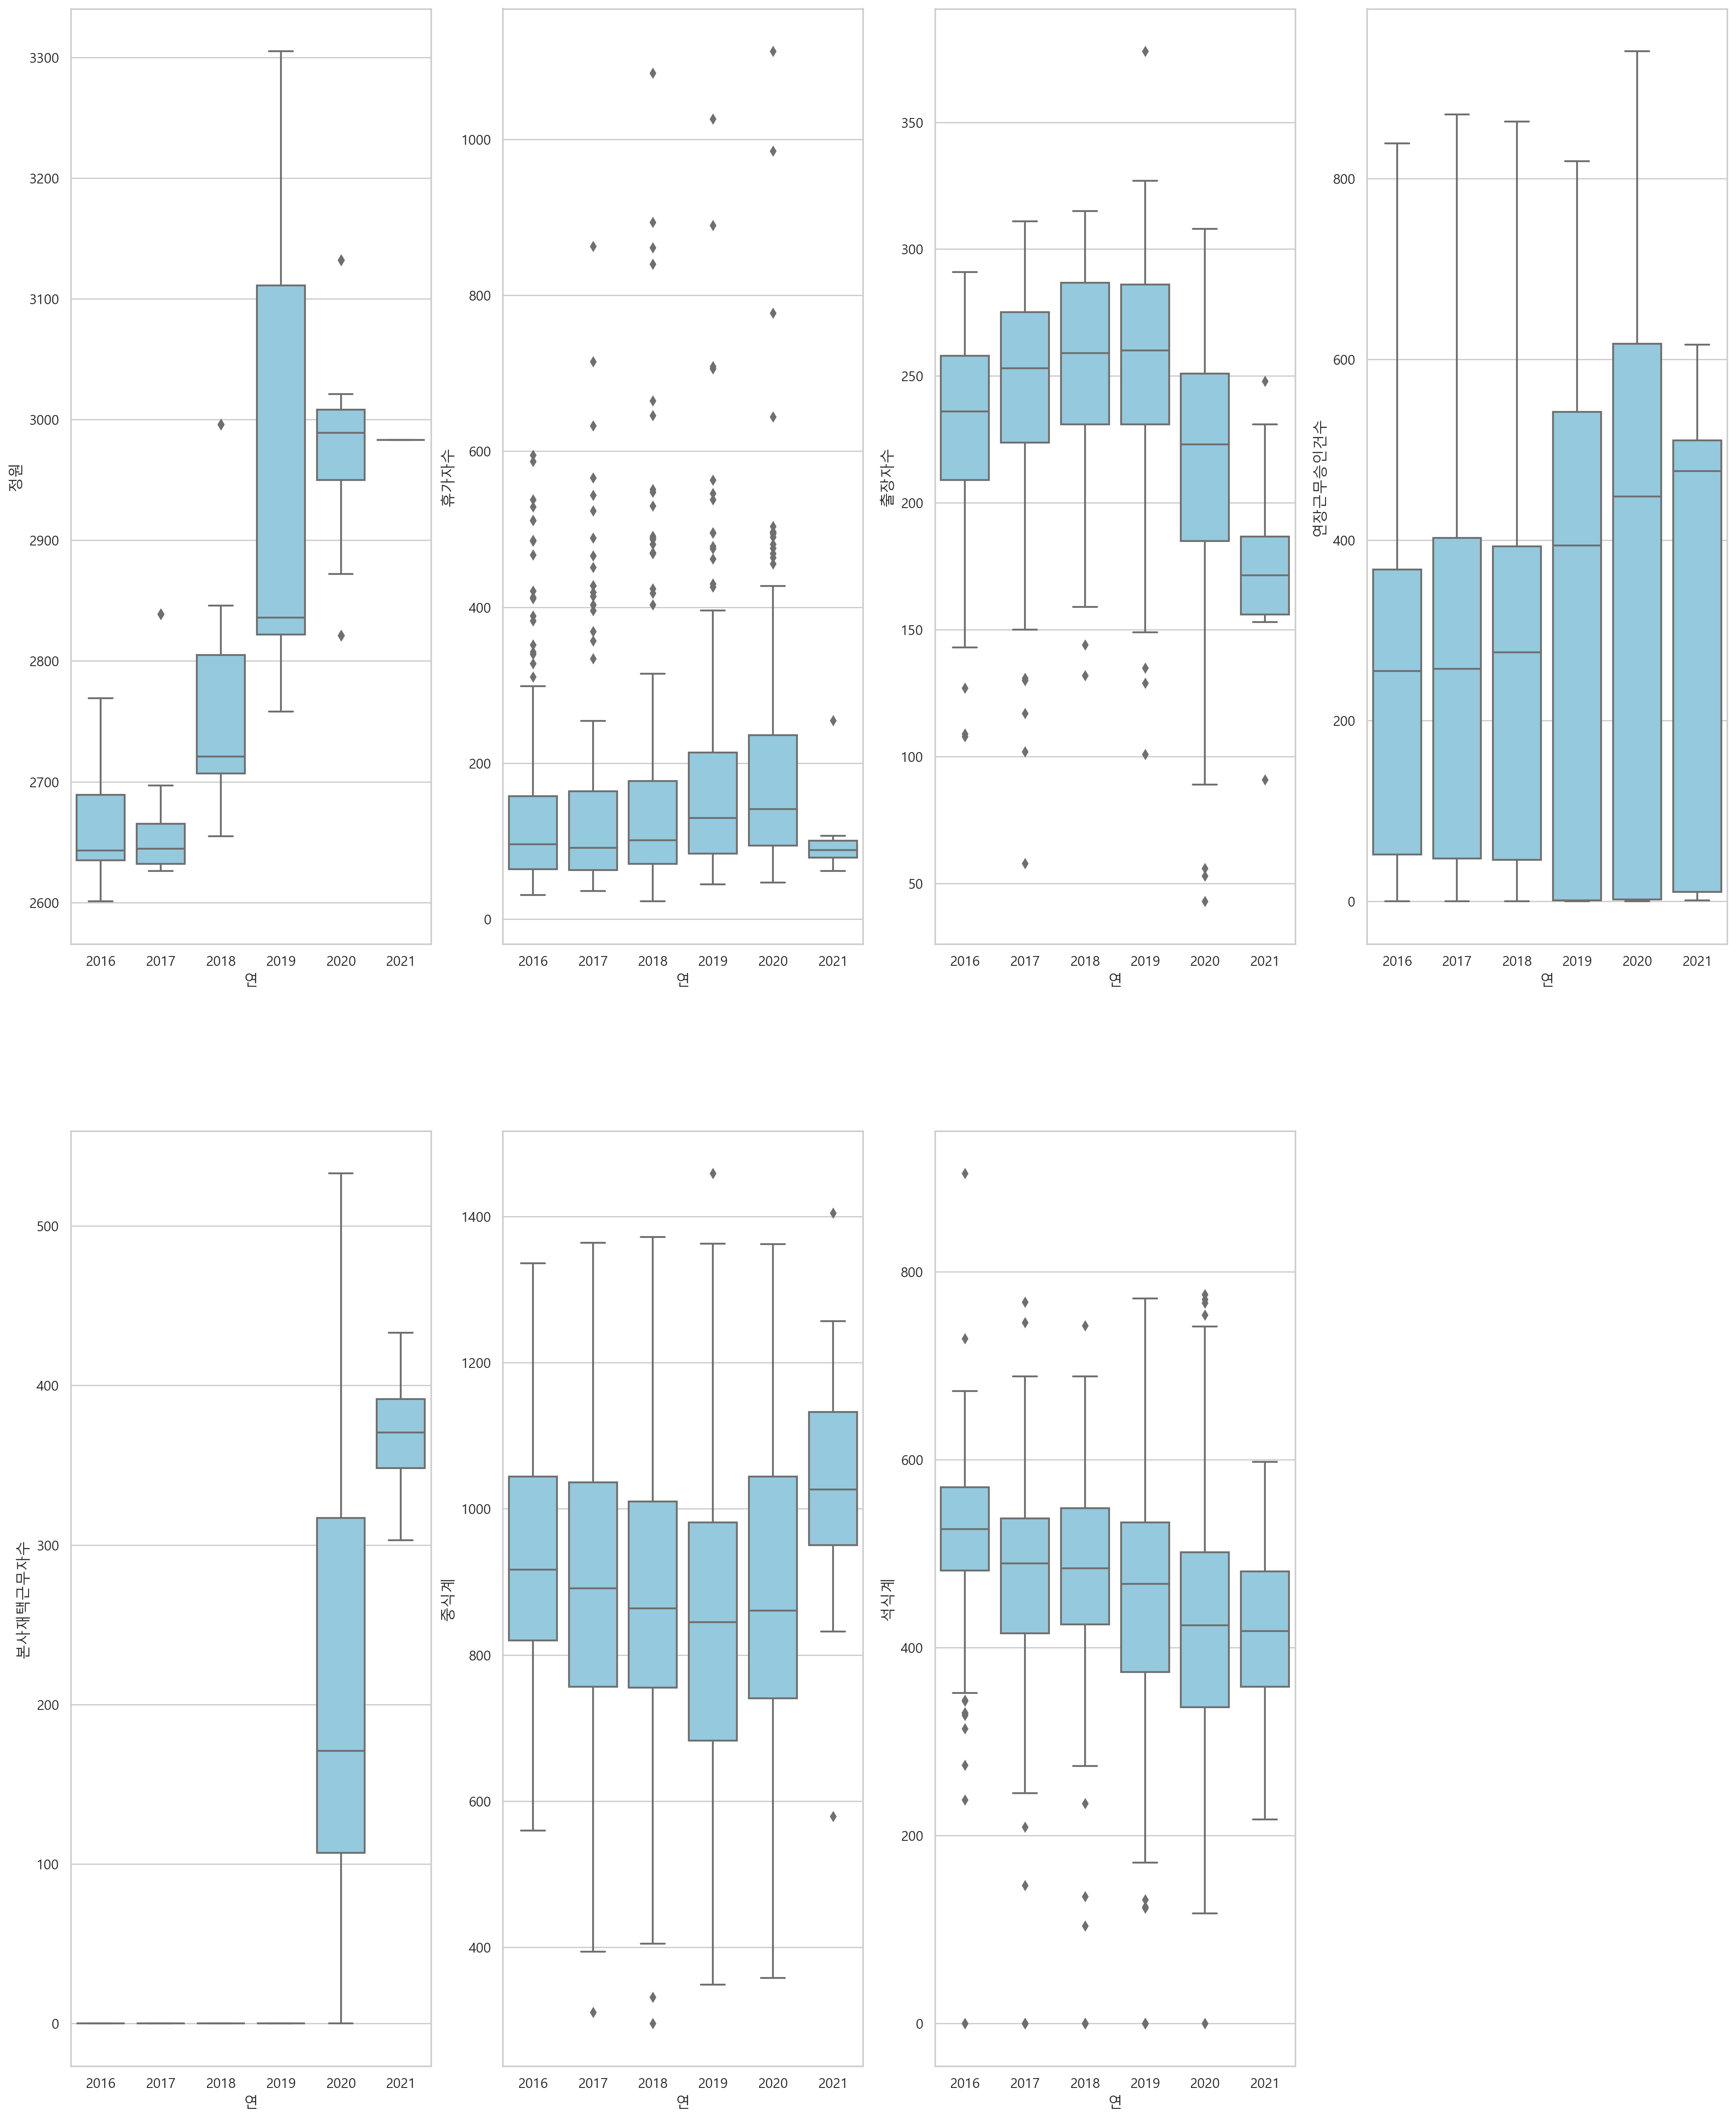

In [15]:
# 연도별  박스플랏

sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
fig, ax1 = plt.subplots(2, 4, figsize=(24, 30))
columns = ["정원","휴가자수","출장자수","연장근무승인건수","본사재택근무자수","중식계","석식계"]

k = 0
for i in range(2):
    for j in range(4):
        if k < len(columns):
            sns.boxplot(x='연', y=columns[k], data=train1, ax=ax1[i][j], color='skyblue')
        else:
            ax1[i][j].axis('off')  # 인덱스를 초과하면 빈 플롯으로 남겨둠
        k += 1
plt.show()

* 연도별 feature : 본사재택근무자수, 정원

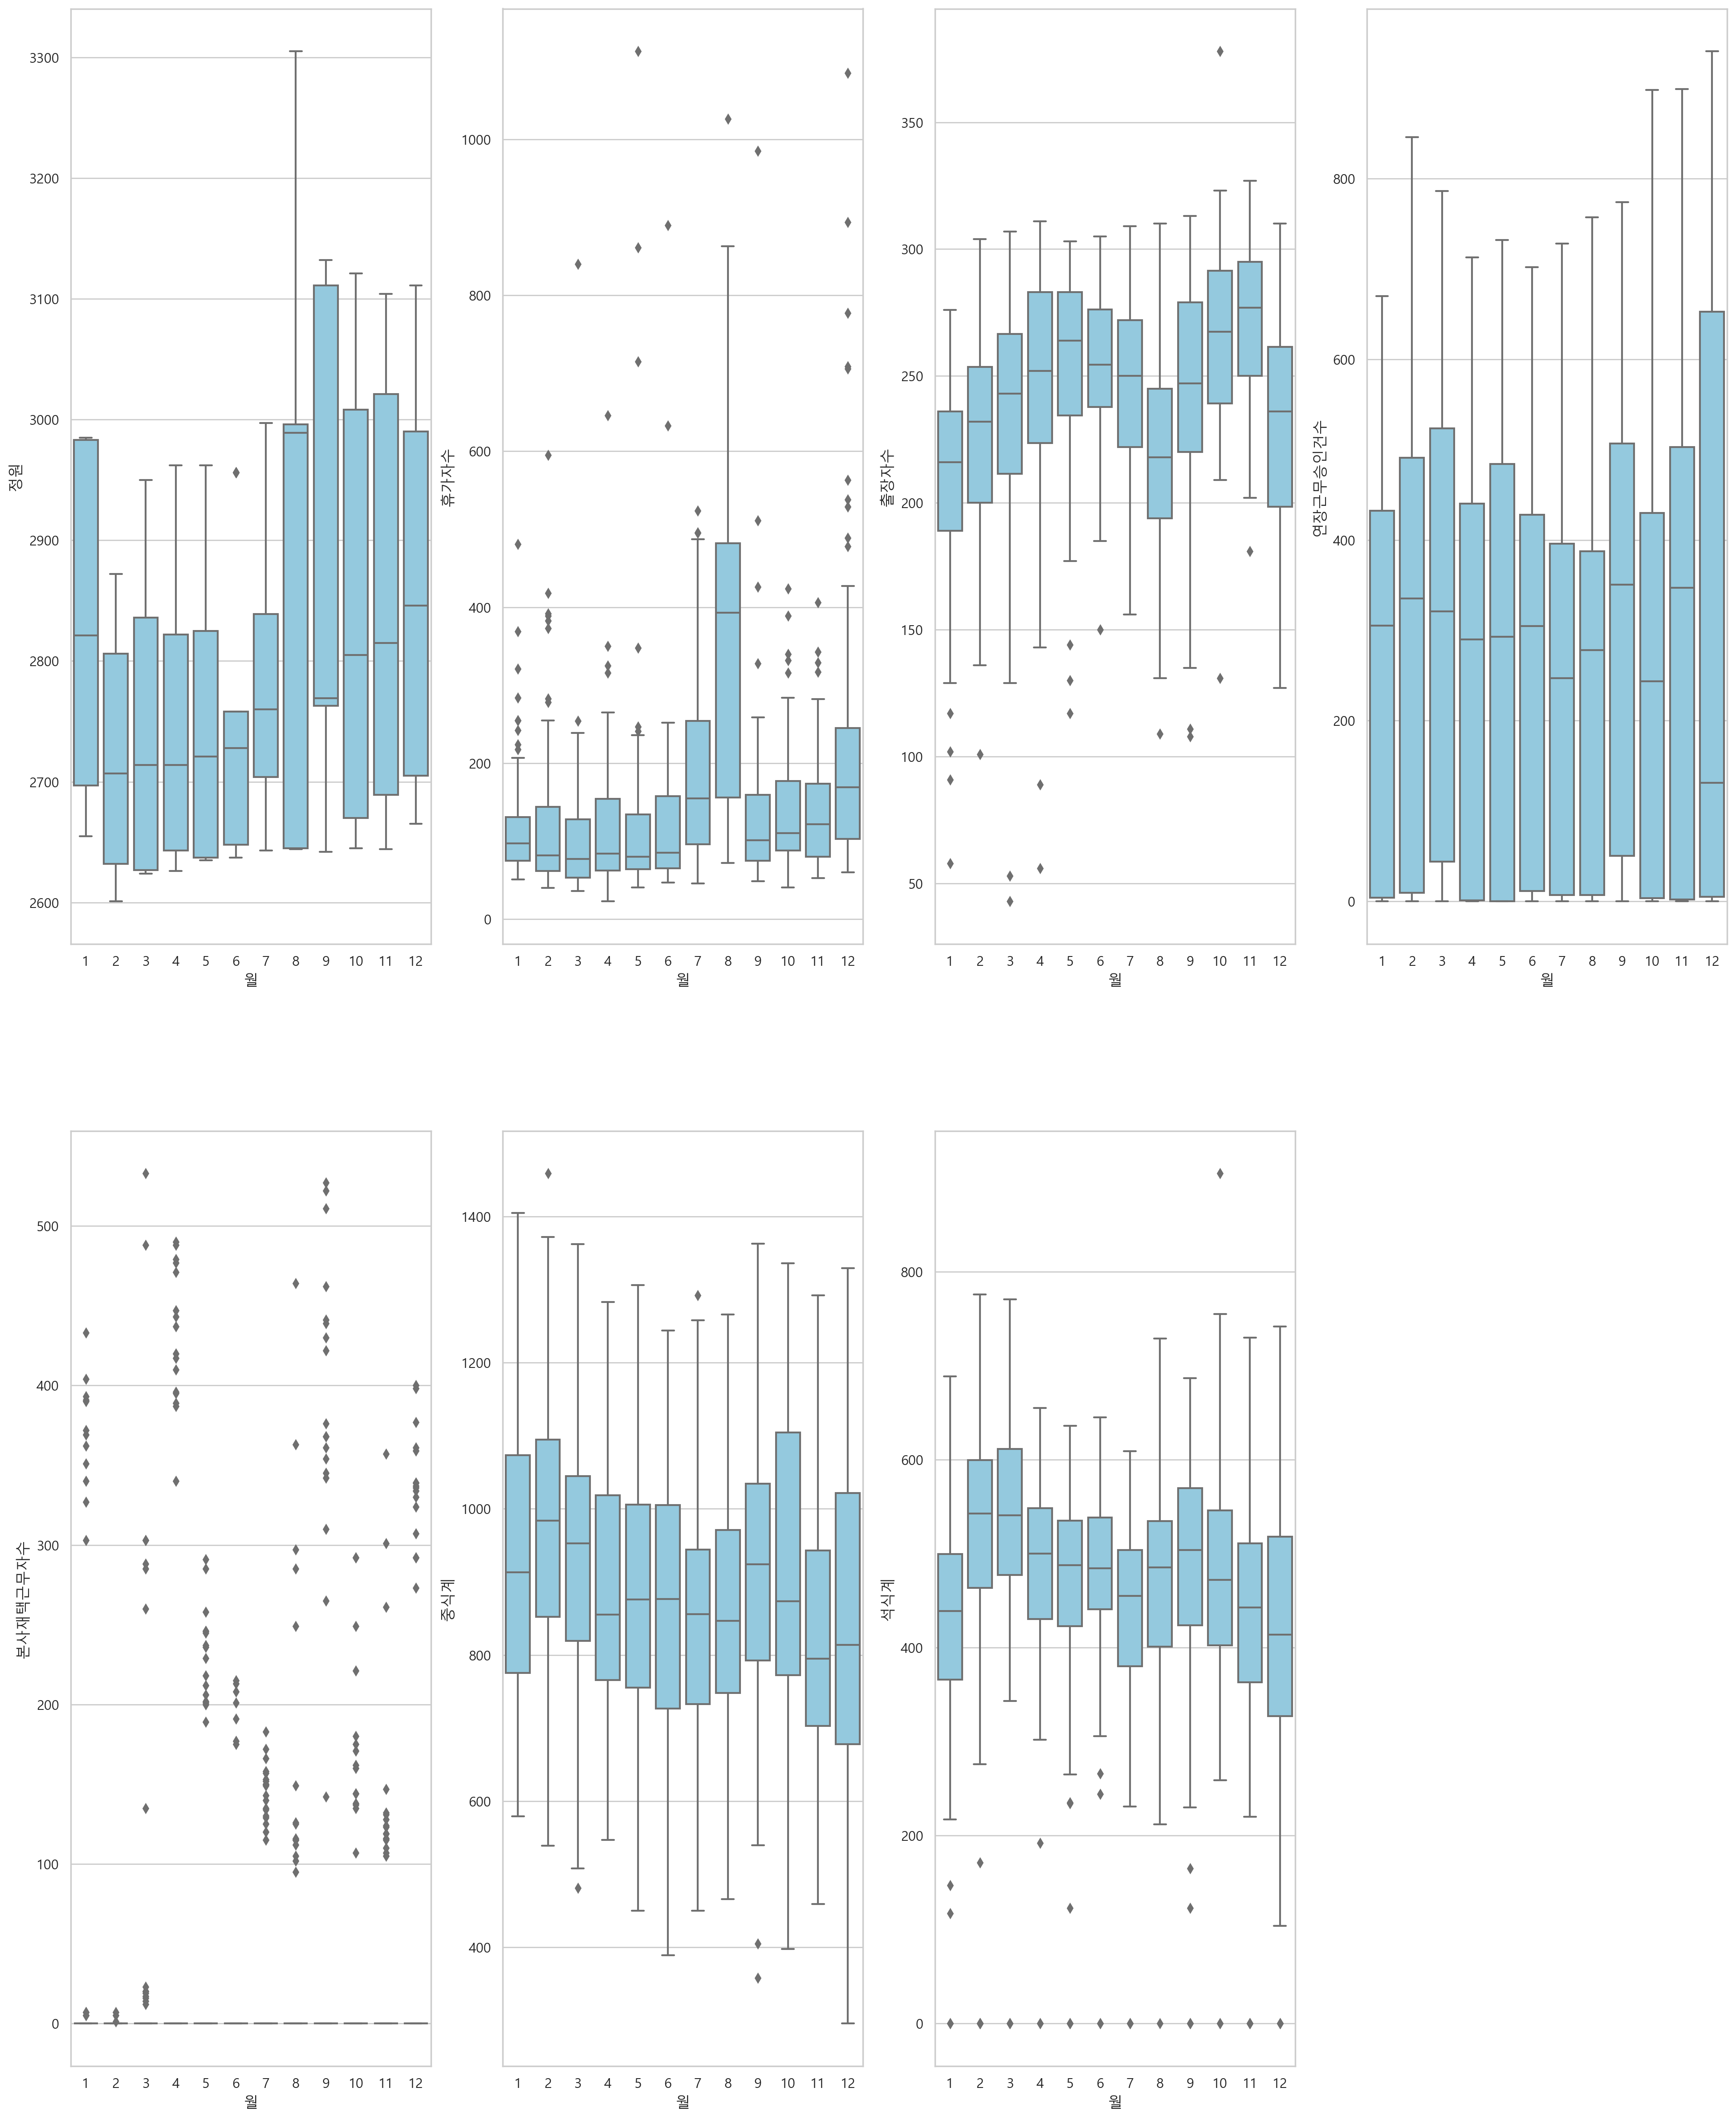

In [16]:
# 월별 박스플랏
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
fig, ax1 = plt.subplots(2, 4, figsize=(24, 30))
columns = ["정원","휴가자수","출장자수","연장근무승인건수","본사재택근무자수","중식계","석식계"]

k = 0
for i in range(2):
    for j in range(4):
        if k < len(columns):
            sns.boxplot(x='월', y=columns[k], data=train1, ax=ax1[i][j], color='skyblue')
        else:
            ax1[i][j].axis('off')  # 인덱스를 초과하면 빈 플롯으로 남겨둠
        k += 1
plt.show()

결론 : 눈이 아프다

-------------------------------

### 3. 열별 간단 탐색 / 이상치 대체

월별로 봐야할 피쳐인지, 연도별로 봐야 할 피쳐인지... 등을 알아내기 위해

* 타겟변수 - 석식계

In [17]:
# 본격 이상치 탐색 전 석식계가 0인 부분이 눈에 띈다.

train1[train1["석식계"]==0] 


,일자,요일,정원,휴가자수,출장자수,연장근무승인건수,본사재택근무자수,조식,중식,석식,중식계,석식계,연,월,일
549,2018-04-25,수,2714,66,285,0,0.00,모닝롤/롤케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 아욱된장국 감자...,비빔밥 (쌀:국내산) 유부장국 오징어튀김 떡밤초 요플레 포기김치 (김치:국내산),,851.00,0.00,2018,4,25
224,2016-12-28,수,2705,166,225,0,0.00,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.00,0.00,2016,12,28
609,2018-07-25,수,2704,226,256,1,0.00,모닝롤/찐빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 새알만두국 애호박...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국 유린기 사각어묵볶음 오이사과생채 포기...,,760.00,0.00,2018,7,25
327,2017-05-31,수,2637,43,265,0,0.00,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.00,0.00,2017,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2018-01-31,수,2655,56,223,0,0.00,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩가루배추국 명엽...,김치제육덮밥 미소장국 양장피잡채 계란찜 아삭고추무침/귤 알타리김치 (김치:...,*,1138.00,0.00,2018,1,31
510,2018-02-28,수,2707,134,278,0,0.00,모닝롤/메론롤케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 바지락국 시...,곤드레밥*강된장 (쌀:국내산) 어묵국 치킨핑거*요거트소스 도토리묵무침 콩조림 ...,*,786.00,0.00,2018,2,28
747,2019-02-27,수,2806,100,274,0,0.00,모닝롤/사과파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 도라...,비빔밥 (쌀:국내산) 유부장국 오징어튀김 떡밤초 음료 포기김치 (김치:국내산),* 자기계발의날 *,944.00,0.00,2019,2,27
955,2019-12-31,화,3111,709,149,22,0.00,모닝롤/야채샌드 우유/주스 스크램블에그 고구마죽/쌀밥 (쌀:국내산) 열무된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 닭볶음탕 (닭:국내산) 부추깻잎전 양배추쌈...,*,349.00,0.00,2019,12,31


메뉴가 없다! 즉 강제 다이어트 해야 하는 날 존재했음. 삭제해버리자.

In [18]:
train1 = train1[train1["석식계"]!=0]


중식 / 석식은 어떻게 대체하면 좋을까? 휴가자수, 정원, 출장자수, 연장근무자수... 모든 피쳐에 영향을 받는다.

- 상관계수가 높은 피쳐(가장 영향력있는?)의 시간 기준으로 대체

- 그냥 단순대체

In [19]:
# 석식은 중식자 수, 연장근무자수와 상관계수가 가장 높았음. 이것도 요일대체?
# 함수 : 요일별 이상치를 각 요일별 평균값으로 대체 (석식계)
def dinner_replace(train1, valid1=None):
    def process_group(group):
        # IQR 계산 
        Q1 = group['석식계'].quantile(0.25)
        Q3 = group['석식계'].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 기준
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 해당 그룹)의 평균값 계산
        mean_value = group['석식계'].mean()
        
        # 이상치 탐지 및 대체
        group['석식계'] = np.where(
            (group['석식계'] < lower_bound) | (group['석식계'] > upper_bound),
            mean_value, group['석식계']
        )
        return group
    
    # train1에서 요일별로 그룹화하여 이상치 처리
    train1 = train1.groupby('요일').apply(process_group)
    train1.reset_index(drop=True, inplace=True)
    
    if valid1 is not None:
        # train1에서 계산된 요일별 평균값을 valid1에 적용
        mean_values = train1.groupby('요일')['석식계'].mean()
        
        def apply_mean_to_valid(group):
            # train1에서 계산된 요일별 평균값 가져오기
            mean_value = mean_values.loc[group['요일'].iloc[0]]
            
            # IQR 계산
            Q1 = group['석식계'].quantile(0.25)
            Q3 = group['석식계'].quantile(0.75)
            IQR = Q3 - Q1

            # 이상치 기준 계산
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # 이상치 탐지 및 대체
            group['석식계'] = np.where(
                (group['석식계'] < lower_bound) | (group['석식계'] > upper_bound),
                mean_value, group['석식계']
            )
            return group
        
        # valid1에서도 요일별로 그룹화하여 train1의 평균값을 사용해 이상치 처리
        valid1 = valid1.groupby('요일').apply(apply_mean_to_valid)
        valid1.reset_index(drop=True, inplace=True)
    
    return train1, valid1

# 함수 호출하여 이상치 대체
train1, valid1 = dinner_replace(train1, valid1)



# 이 방법 별로면 걍 삭제할 예정

C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\1903490651.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\1903490651.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\1903490651.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

In [20]:
# 함수 : 요일별 이상치를 각 요일별 평균값으로 대체 (중식계)
def lunch_replace(train1, valid1=None):
    def process_group(group):
        # IQR 계산 (현재 그룹에 대해 수행)
        Q1 = group['중식계'].quantile(0.25)
        Q3 = group['중식계'].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 기준 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 해당 그룹(요일)의 평균값 계산
        mean_value = group['중식계'].mean()
        
        # 이상치 탐지 및 대체
        group['중식계'] = np.where(
            (group['중식계'] < lower_bound) | (group['중식계'] > upper_bound),
            mean_value, group['중식계']
        )
        return group
    
    # train1에서 요일별로 그룹화하여 이상치 처리
    train1 = train1.groupby('요일').apply(process_group)
    train1.reset_index(drop=True, inplace=True)
    
    if valid1 is not None:
        # train1에서 계산된 요일별 평균값을 valid1에 적용
        mean_values = train1.groupby('요일')['중식계'].mean()
        
        def apply_mean_to_valid(group):
            # train1에서 계산된 요일별 평균값 가져오기
            mean_value = mean_values.loc[group['요일'].iloc[0]]
            
            # IQR 계산
            Q1 = group['중식계'].quantile(0.25)
            Q3 = group['중식계'].quantile(0.75)
            IQR = Q3 - Q1

            # 이상치 기준 계산
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # 이상치 탐지 및 대체
            group['중식계'] = np.where(
                (group['중식계'] < lower_bound) | (group['중식계'] > upper_bound),
                mean_value, group['중식계']
            )
            return group
        
        # valid1에서도 요일별로 그룹화하여 train1의 평균값을 사용해 이상치 처리
        valid1 = valid1.groupby('요일').apply(apply_mean_to_valid)
        valid1.reset_index(drop=True, inplace=True)
    
    return train1, valid1

# 함수 호출하여 이상치 대체
train1, valid1 = lunch_replace(train1, valid1)



C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\1289725525.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\1289725525.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\1289725525.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

- 휴가자수

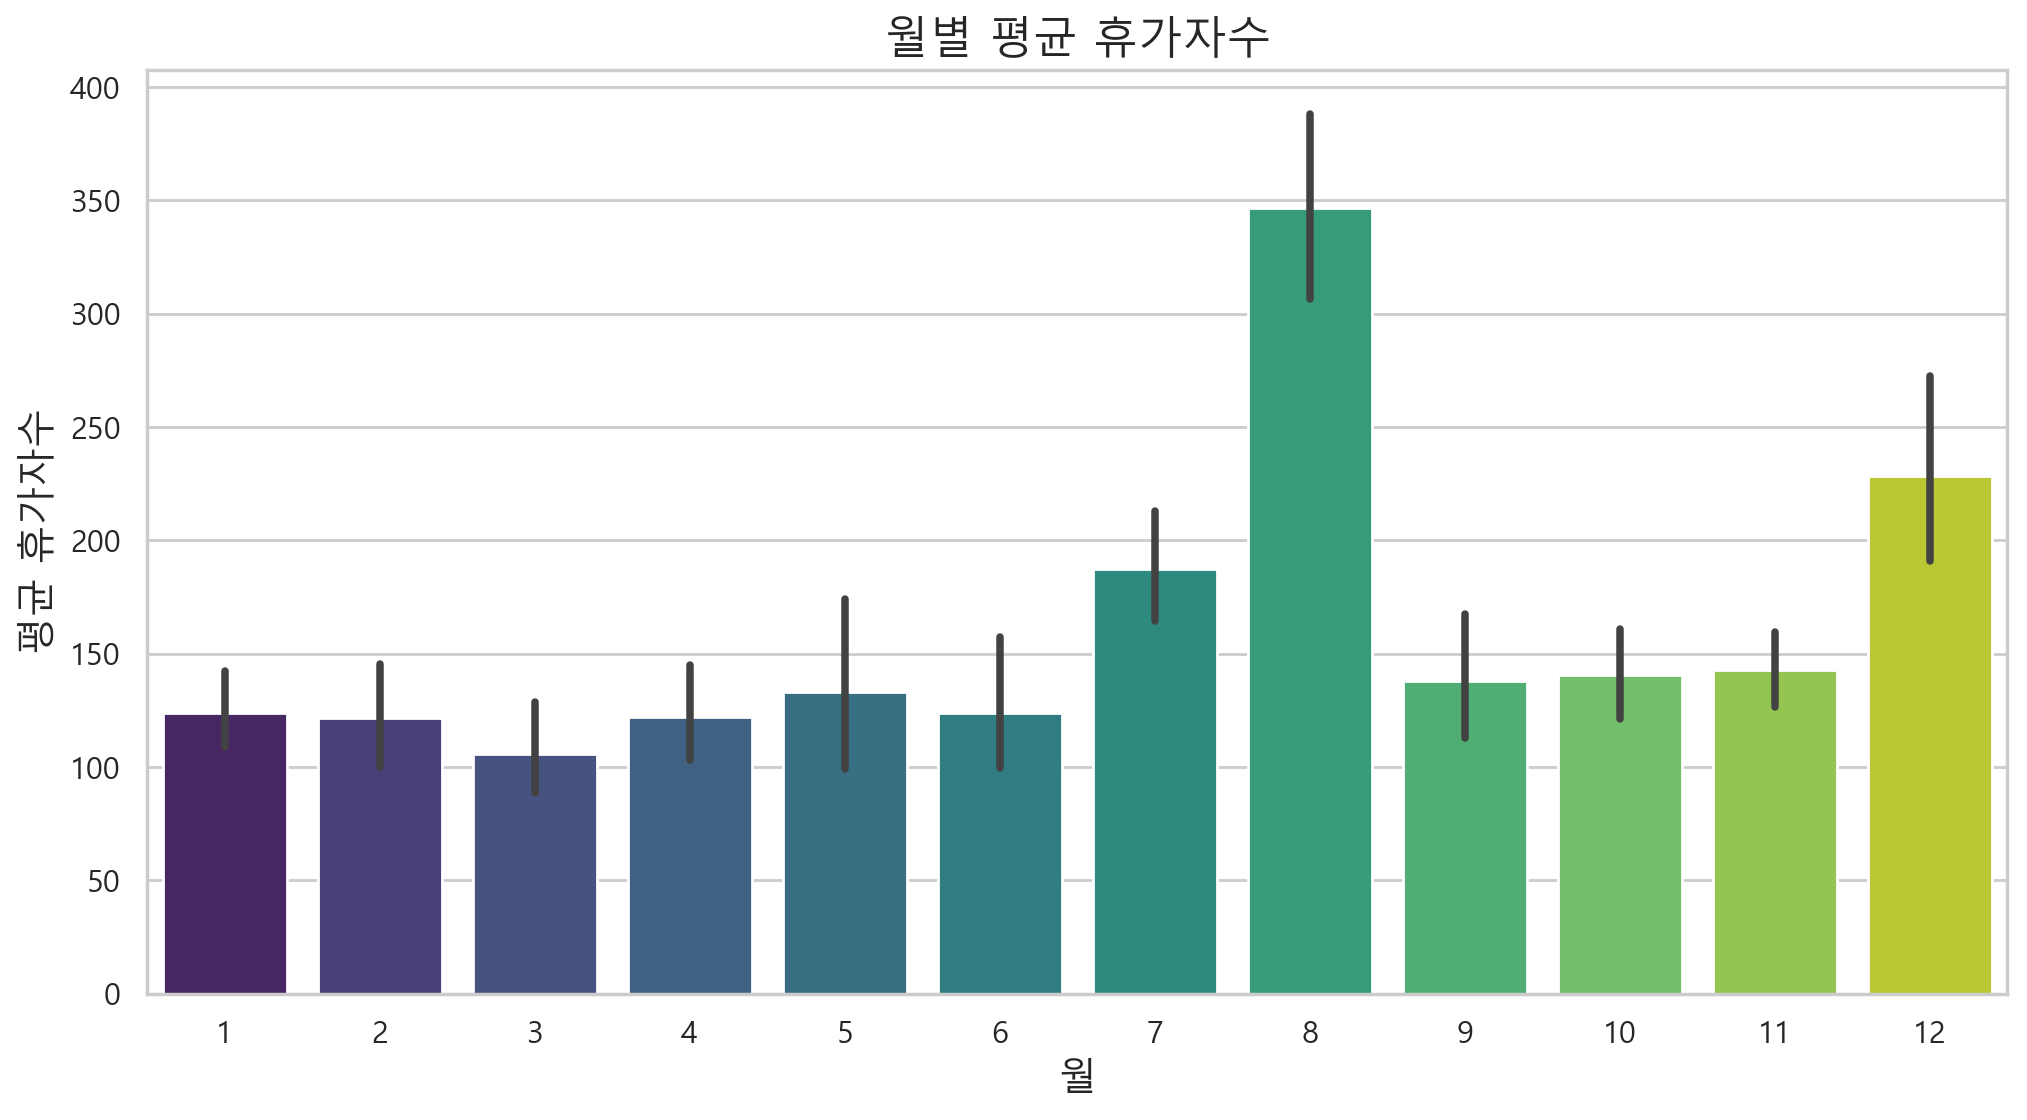

In [21]:
a = train1.groupby(['월'])["휴가자수"].mean()

plt.figure(figsize=(12, 6))  
sns.barplot(x='월', y='휴가자수', data=train1, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('월별 평균 휴가자수', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('평균 휴가자수', fontsize=14)

# 그래프 보여주기
plt.xticks(rotation=0)  # X축 레이블 회전
plt.show()

       연   분기   휴가자수
0   2016  1분기 107.70
1   2016  2분기  85.53
2   2016  3분기 217.58
3   2016  4분기 127.57
..   ...  ...    ...
17  2020  2분기 174.10
18  2020  3분기 251.53
19  2020  4분기 205.71
20  2021  1분기 100.33

[21 rows x 3 columns]


Text(0, 0.5, '평균 휴가자수')

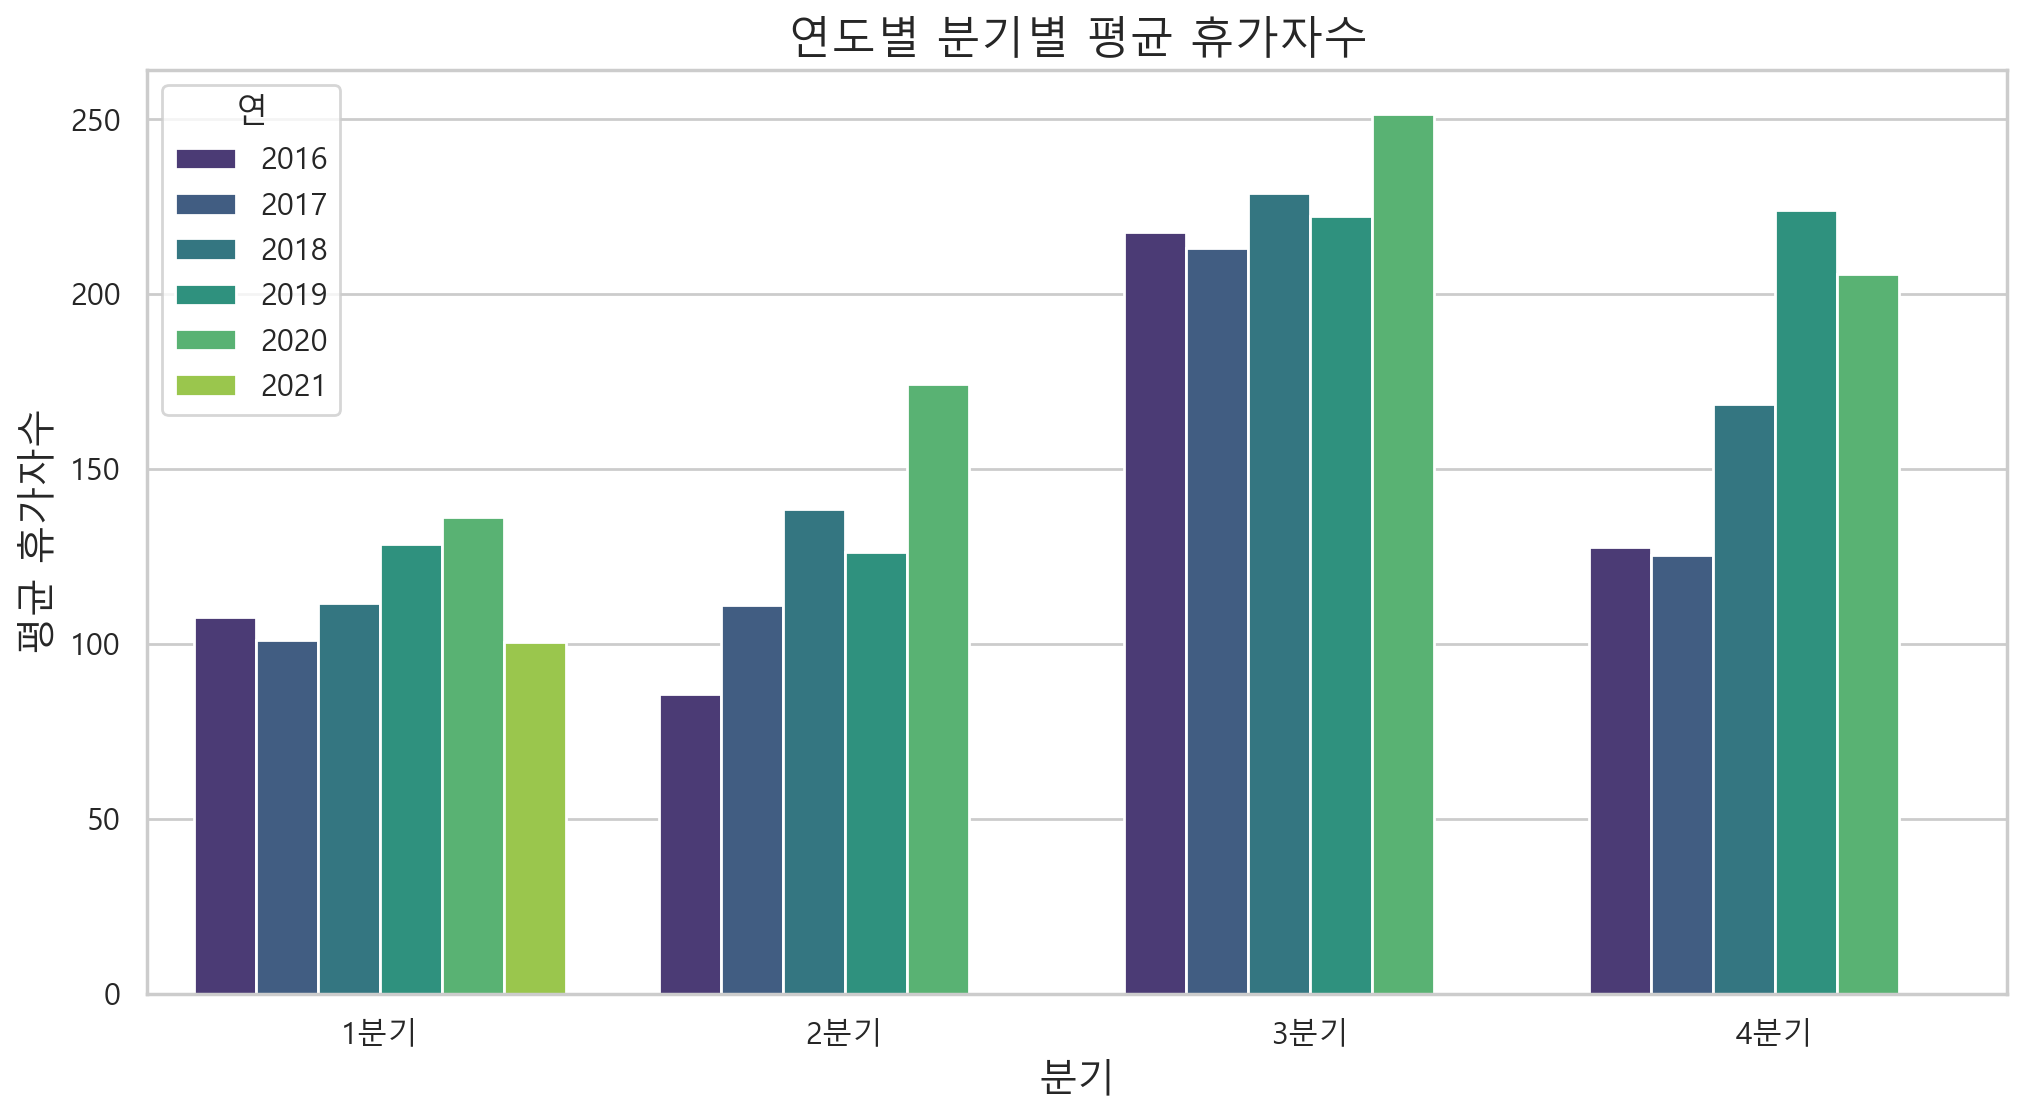

In [22]:
# 연도별로도 보기 위해, 월을 계절로 단순화하여 다시 시각화 

# 연도가 넘어가는게 헷갈려서 분기 별로 보기로 결정


def get_season(month):
    if month in [10, 11, 12]:
        return '4분기'
    elif month in [7, 8, 9]:
        return '3분기'
    elif month in [4, 5, 6]:
        return '2분기'
    else:
        return '1분기'

# 계절 열 추가
train1['분기'] = train1['월'].apply(get_season)
valid1['분기'] = valid1['월'].apply(get_season)

# 계절별 평균 휴가자수 계산
seasonal_average = train1.groupby(['연', '분기'])['휴가자수'].mean().reset_index()

# 결과 출력
print(seasonal_average)

# Seaborn 막대그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='분기', y='휴가자수', hue='연', data=seasonal_average, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('연도별 분기별 평균 휴가자수', fontsize=16)
plt.xlabel('분기', fontsize=14)
plt.ylabel('평균 휴가자수', fontsize=14)


여름 휴가자(3분기)는 모든 연도에 대해서 다른 분기보다 많은 것.

겨울(연말) 휴가자는 특이하게 2019, 2020년에 훨씬 많은 분포를 띔.

어쩄든 이건 월별로 봐야 효과적인 피쳐임을 알 수 있다.

휴가자 이상치에 관해 좀 더 알아보자

In [23]:
# 다른 월에 해당되는 이상치들을 한번만 간단히 살펴보자.(삭제할지 아닐지를 정하기 위해)
vacationlot1 = train1.loc[((train1["휴가자수"] >= 300) & (train1["월"].isin([1, 2, 3, 4, 5, 6, 9, 10, 11])))]

# 휴가철 이상치, 8월은 이상치가 1개라 제외
vacationlot = train1.loc[(train1["휴가자수"]>=500) & train1["월"].isin([7,12])]

In [24]:
# 연도 또는 월별 특성의 차이가 이상치에도 있나
aa = vacationlot.groupby('월').size().reset_index()
aa.columns = ['월', '이상치 개수']  
aa = aa.sort_values(by = "이상치 개수", ascending=False).reset_index(drop=True)

bb = vacationlot1.groupby('월').size().reset_index()
bb.columns = ['월', '이상치 개수']  
bb = bb.sort_values(by = "이상치 개수", ascending=False).reset_index(drop=True)



result = pd.concat([aa, bb])

result = result.sort_values(by = "이상치 개수", ascending=False).reset_index(drop=True)

result


# 특정 공휴일로 인해 이상치로 찍히는 듯 함.

# 오히려 여름 휴가철에는 평균 휴가자가 많아서 이상치가 적음

,월,이상치 개수
0,12,7
1,2,5
2,10,5
3,4,4
...,...,...
7,1,3
8,6,2
9,7,1
10,3,1


In [25]:
# 함수 정의: 월별 이상치를 각 월별 평균값으로 대체
def vacationreplace(train1):
    def process_group(group):
        # IQR 계산 (현재 그룹에 대해 수행)
        Q1 = group['휴가자수'].quantile(0.25)
        Q3 = group['휴가자수'].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 기준 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 해당 그룹(월)의 평균값 계산
        mean_value = group['휴가자수'].mean()
        
        # 이상치 탐지 및 대체
        group['휴가자수'] = np.where(
            (group['휴가자수'] < lower_bound) | (group['휴가자수'] > upper_bound),
            mean_value, group['휴가자수']
        )
        return group
    
    # 월별로 그룹화하여 이상치 처리
    train1 = train1.groupby('월').apply(process_group)
    # 인덱스 리셋(끄룹바이로인한 혼란방지)
    train1.reset_index(drop=True, inplace=True)
    
    return train1

# 함수 호출하여 이상치 대체
train1 = vacationreplace(train1)
valid1 = vacationreplace(valid1)


# 이 방법 별로면 걍 삭제할 예정


C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\3495191012.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train1 = train1.groupby('월').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\3495191012.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train1 = train1.groupby('월').apply(process_group)


<Axes: xlabel='월', ylabel='휴가자수'>

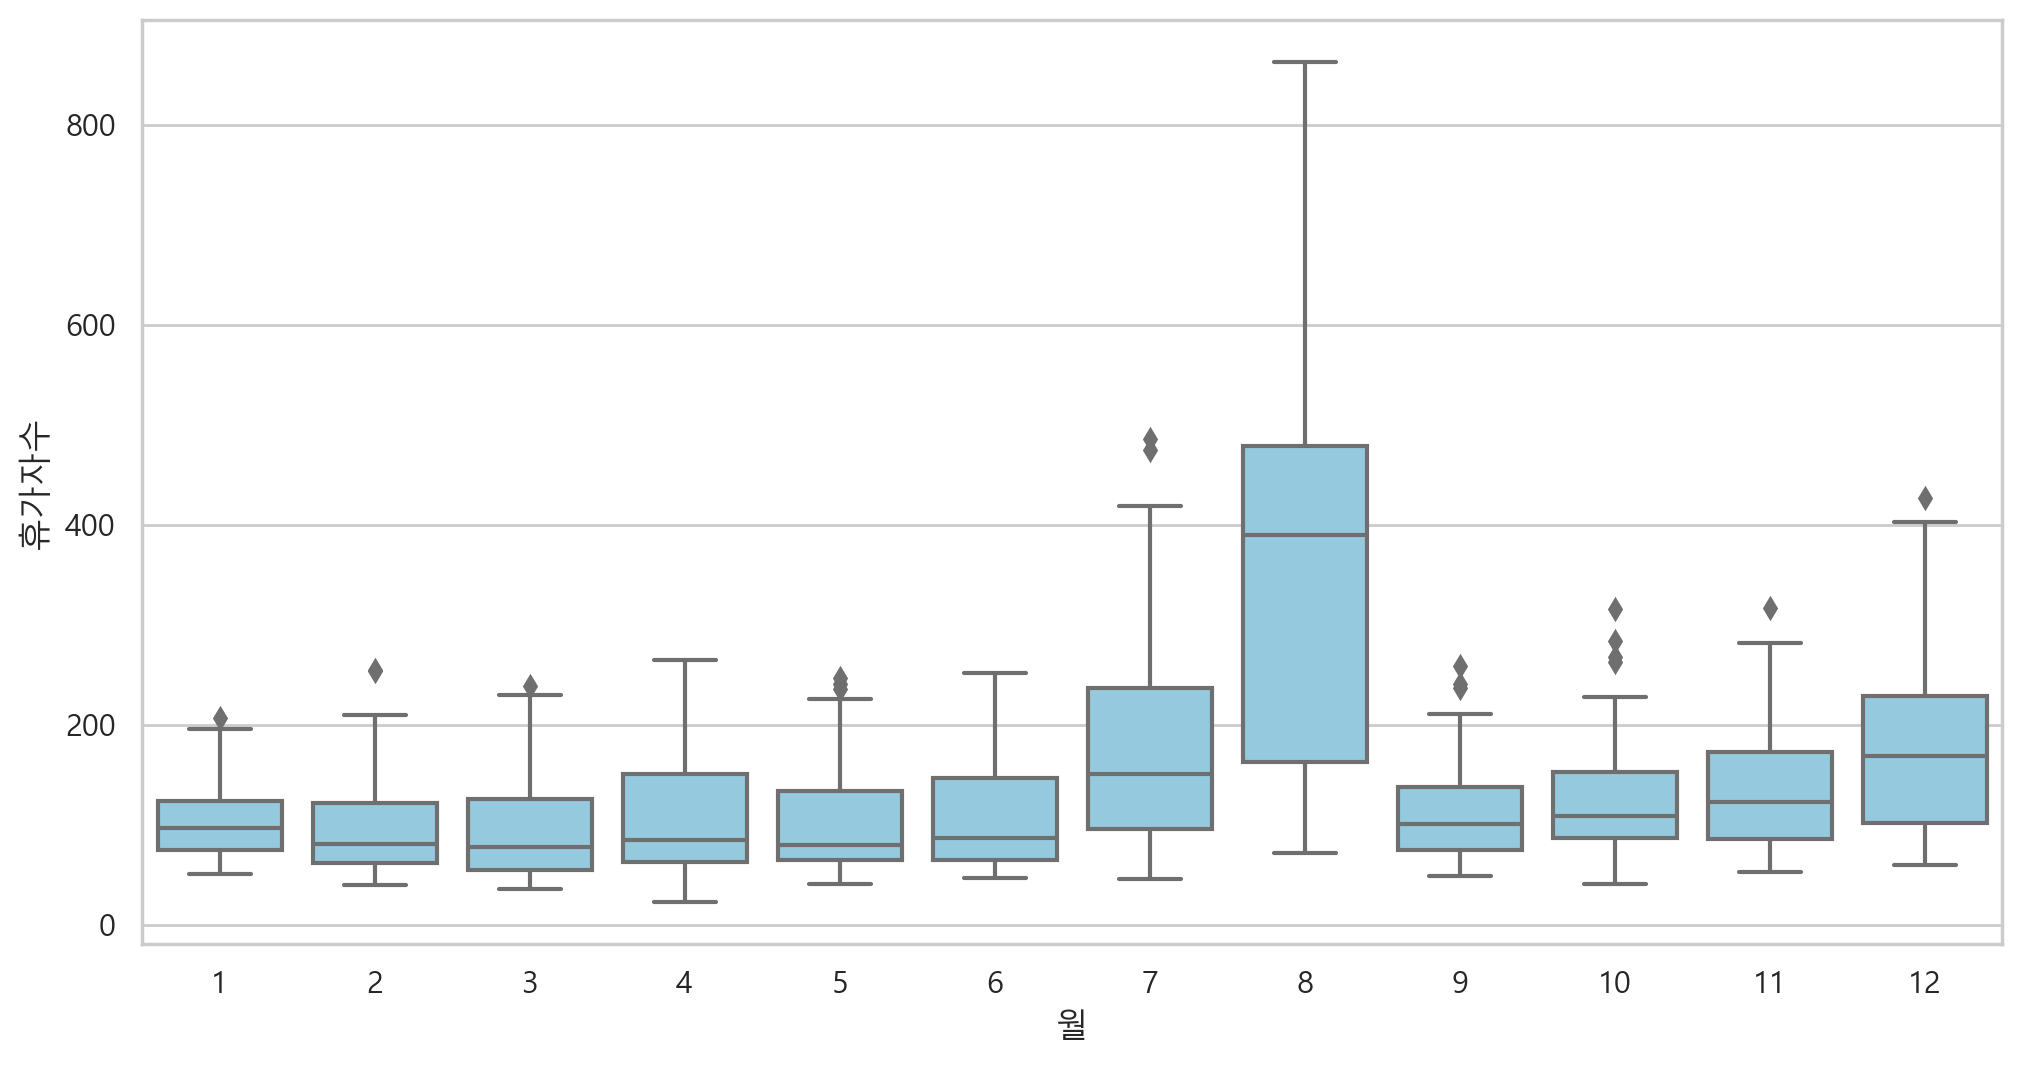

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='월', y="휴가자수", data=train1, color='skyblue')

------------------------------------------------------------------------

- 출장자수

앞의 박스플랏에서 출장자수는 요일 별로 보았을때 

월~금 순으로 증가하는 패턴을 보였다. 

월별로도 살펴보자

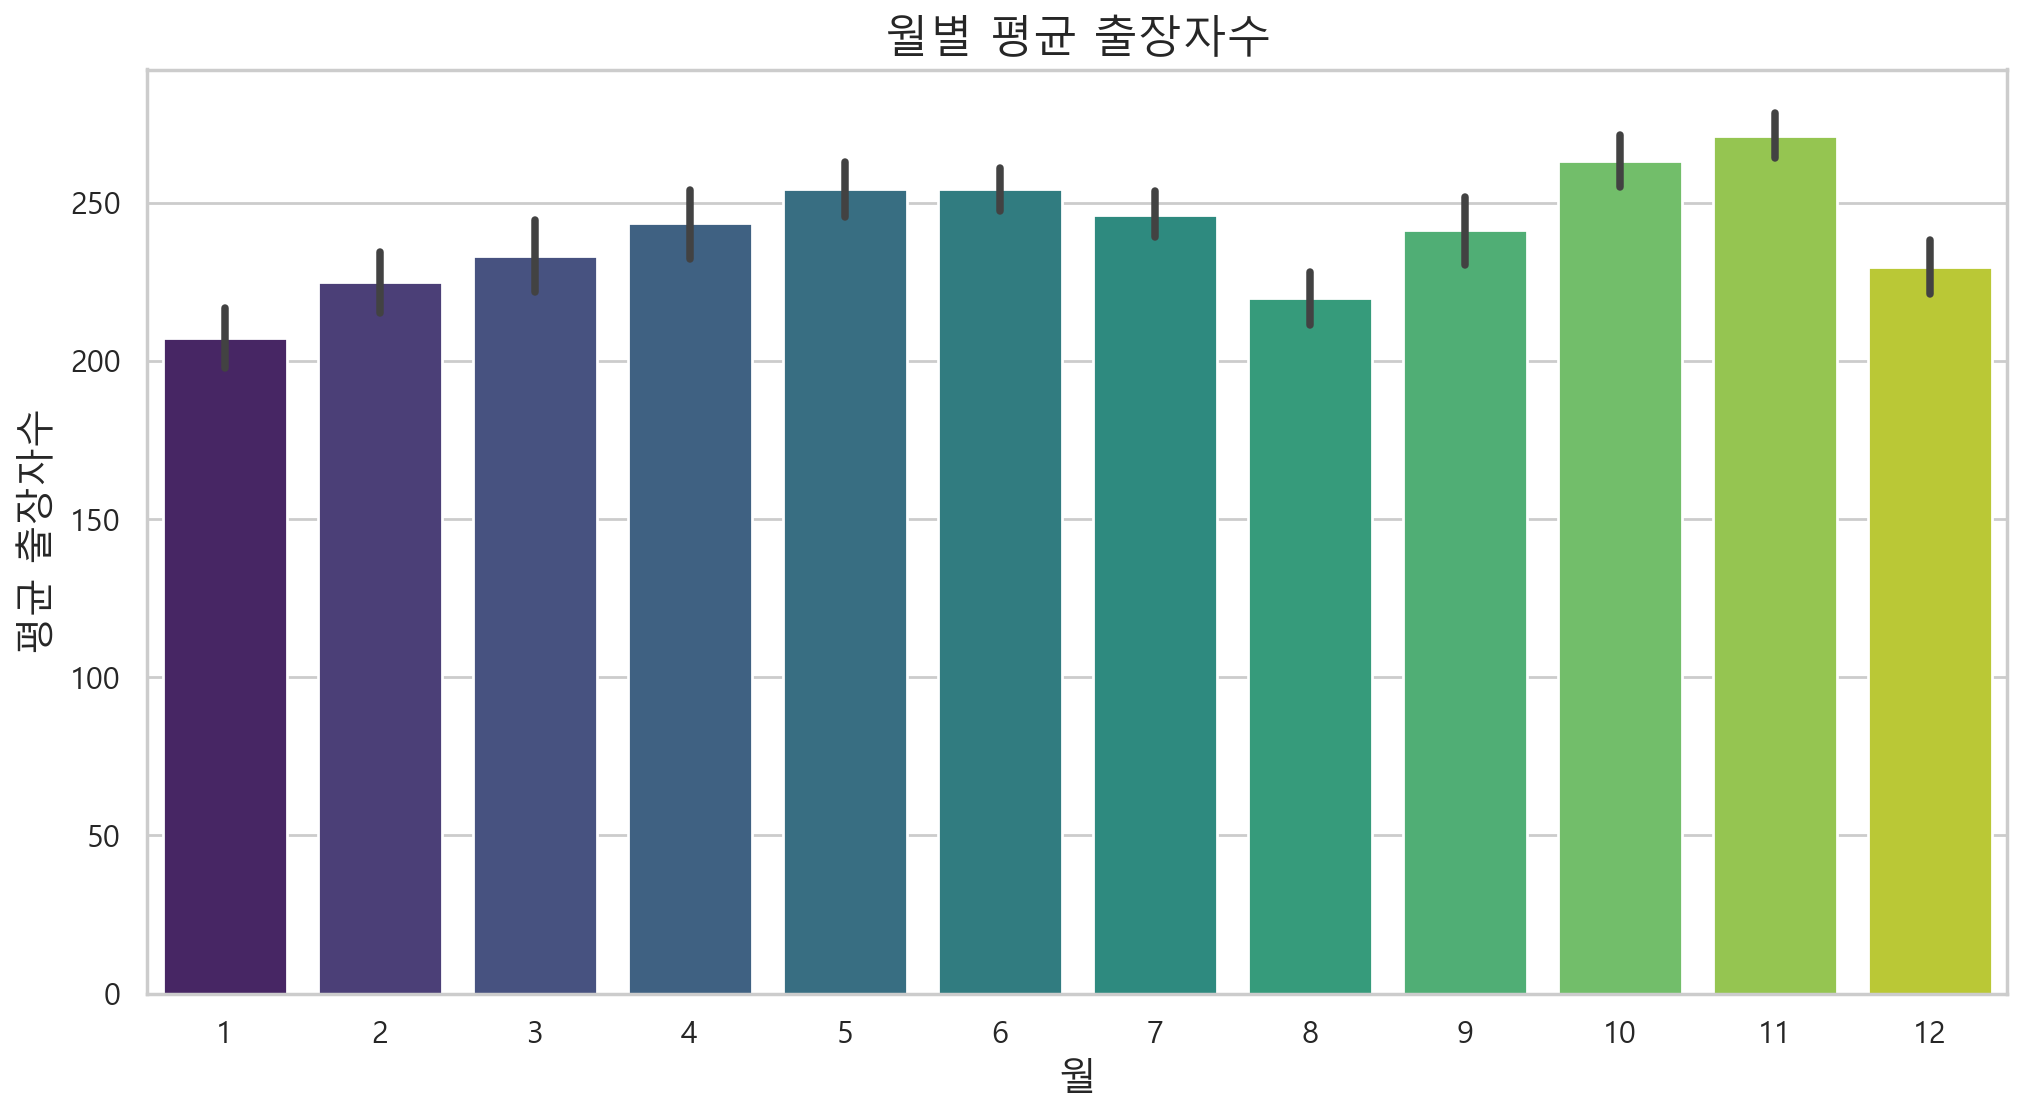

In [27]:
a = train1.groupby(['월'])["출장자수"].mean()

plt.figure(figsize=(12, 6))  
sns.barplot(x='월', y='출장자수', data=train1, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('월별 평균 출장자수', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('평균 출장자수', fontsize=14)

# 그래프 보여주기
plt.xticks(rotation=0)  # X축 레이블 회전
plt.show()

# 휴가자수가 많은 8,12월에 근소한 감소가 있을 뿐 큰 차이 없는듯함.
# 1월 출장이 좀 적음

       연   분기   출장자수
0   2016  1분기 220.11
1   2016  2분기 247.18
2   2016  3분기 216.70
3   2016  4분기 242.70
..   ...  ...    ...
17  2020  2분기 216.18
18  2020  3분기 221.06
19  2020  4분기 234.27
20  2021  1분기 174.42

[21 rows x 3 columns]


Text(0, 0.5, '평균 출장자수')

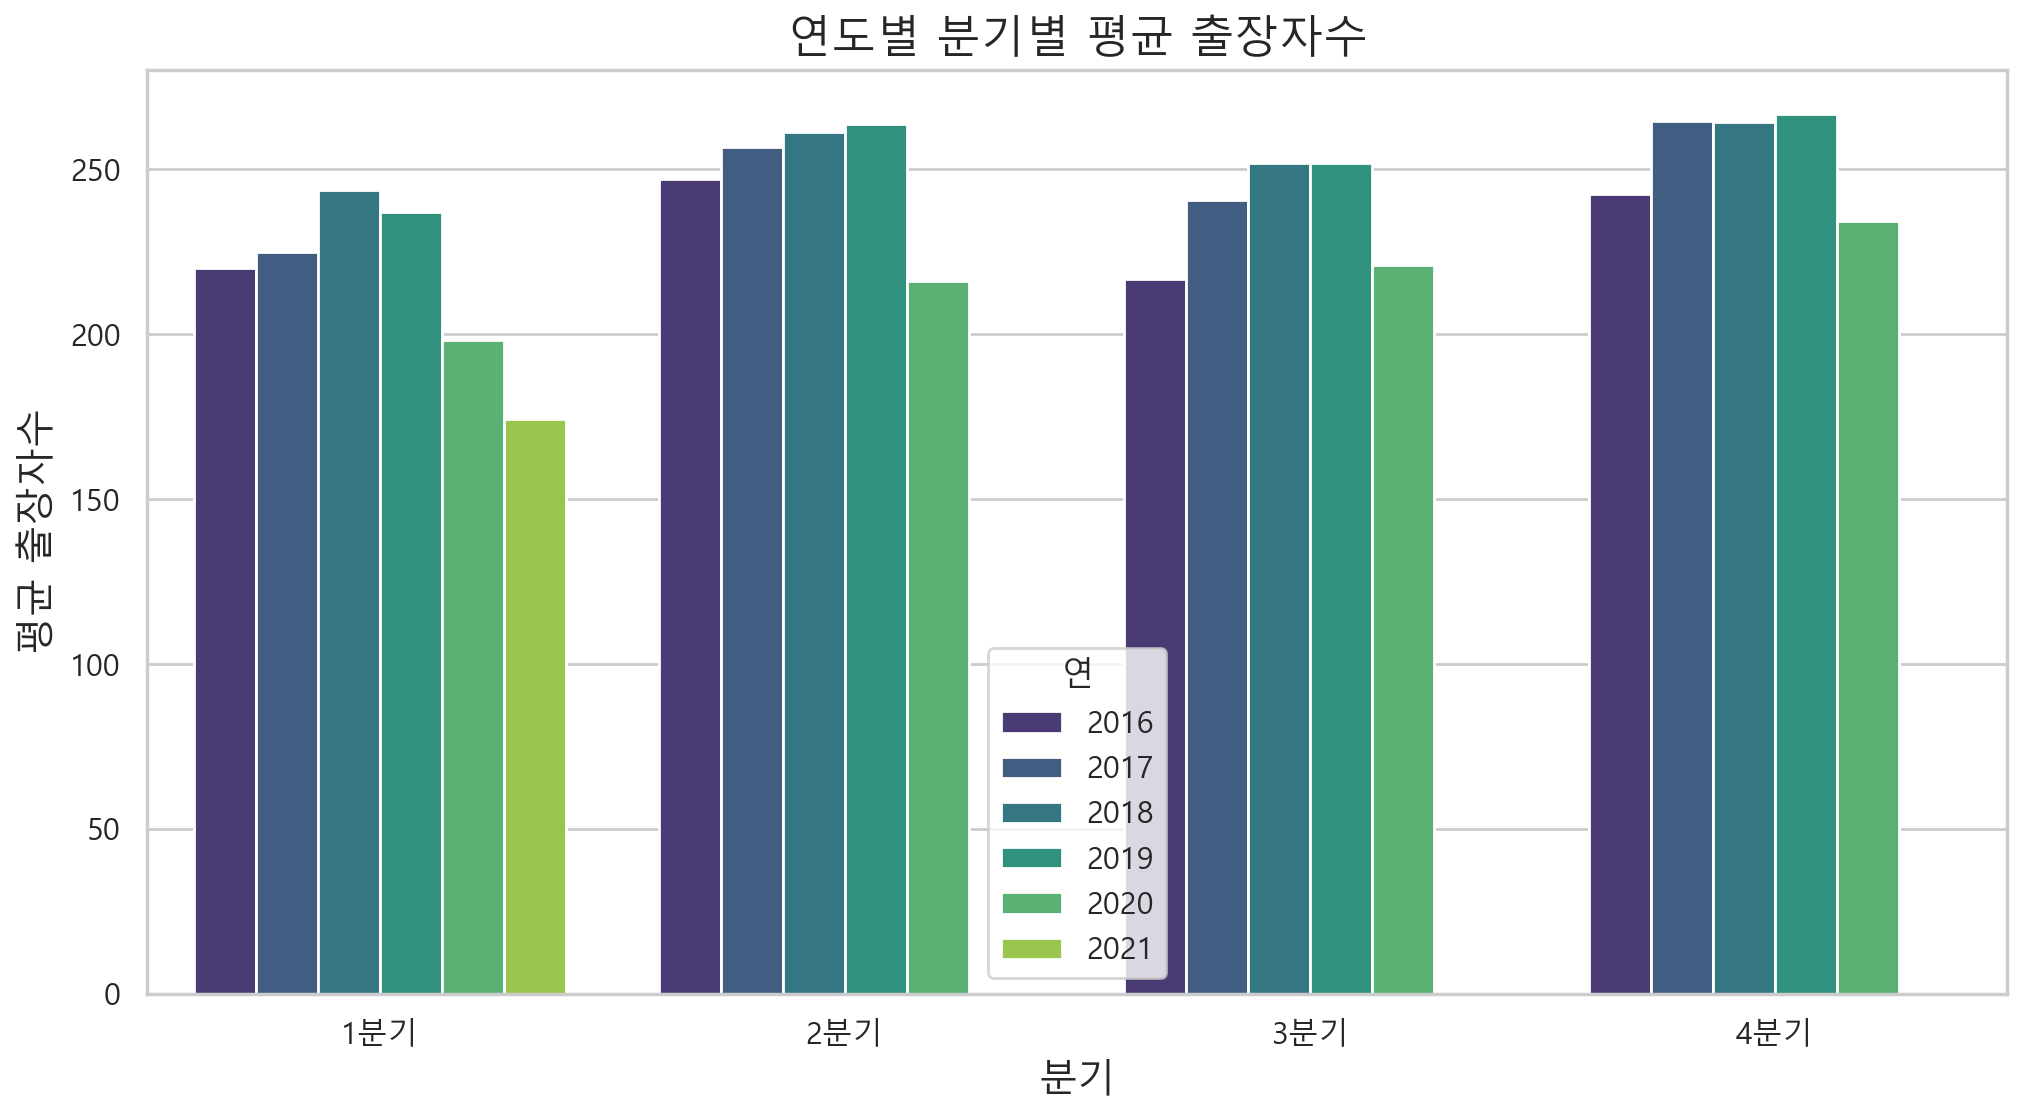

In [28]:
# 연도별로도 보기 위해, 월을 계절로 단순화하여 다시 시각화 

# 연도가 넘어가는게 헷갈려서 분기 별로 보기로 결정


def get_season(month):
    if month in [10, 11, 12]:
        return '4분기'
    elif month in [7, 8, 9]:
        return '3분기'
    elif month in [4, 5, 6]:
        return '2분기'
    else:
        return '1분기'

# 계절 열 추가
train1['분기'] = train1['월'].apply(get_season)

# 계절별 평균 휴가자수 계산
seasonal_average = train1.groupby(['연', '분기'])['출장자수'].mean().reset_index()

# 결과 출력
print(seasonal_average)

# Seaborn 막대그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='분기', y='출장자수', hue='연', data=seasonal_average, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('연도별 분기별 평균 출장자수', fontsize=16)
plt.xlabel('분기', fontsize=14)
plt.ylabel('평균 출장자수', fontsize=14)

2020, 2021년이 특이하게 적어지긴 함. 그러나 근소한 차이

In [29]:
# 이상치만 좀 더 살펴보자(아마 2021년 때문일것 같긴 함)

# 150 아래 기준으로 결정

businesstriplot = train1[train1["출장자수"]<150]

aa = businesstriplot.groupby(['연','월']).size().reset_index()
aa.columns = ['연','월', '이상치 개수']  # 열 이름 설정
aa.sort_values(by = "이상치 개수", ascending=False).reset_index(drop=True)


,연,월,이상치 개수
0,2020,3,7
1,2020,4,4
2,2017,1,3
3,2020,1,3
...,...,...,...
17,2017,5,1
18,2016,12,1
19,2016,9,1
20,2021,1,1


연도로 봐도 큰 의미는 잘모르겠으니

이건 요일별 평균으로 대체하자

In [30]:
# 함수 정의: 월별 이상치를 각 요일별 평균값으로 대체

def businesstrip_replace(train1):
    def process_group(group):
        # IQR 계산 (현재 그룹에 대해 수행)
        Q1 = group['출장자수'].quantile(0.25)
        Q3 = group['출장자수'].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 기준 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 해당 그룹(월)의 평균값 계산
        mean_value = group['출장자수'].mean()
        
        # 이상치 탐지 및 대체
        group['출장자수'] = np.where(
            (group['출장자수'] < lower_bound) | (group['출장자수'] > upper_bound),
            mean_value, group['출장자수']
        )
        return group
    
    # 요일별로 그룹화하여 이상치 처리
    train1 = train1.groupby('요일').apply(process_group)
    train1.reset_index(drop=True, inplace=True)
    
    return train1

# 함수 호출하여 이상치 대체
train1 = businesstrip_replace(train1)
valid1 = businesstrip_replace(valid1)

C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\658636807.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\658636807.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\658636807.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='요일', ylabel='출장자수'>

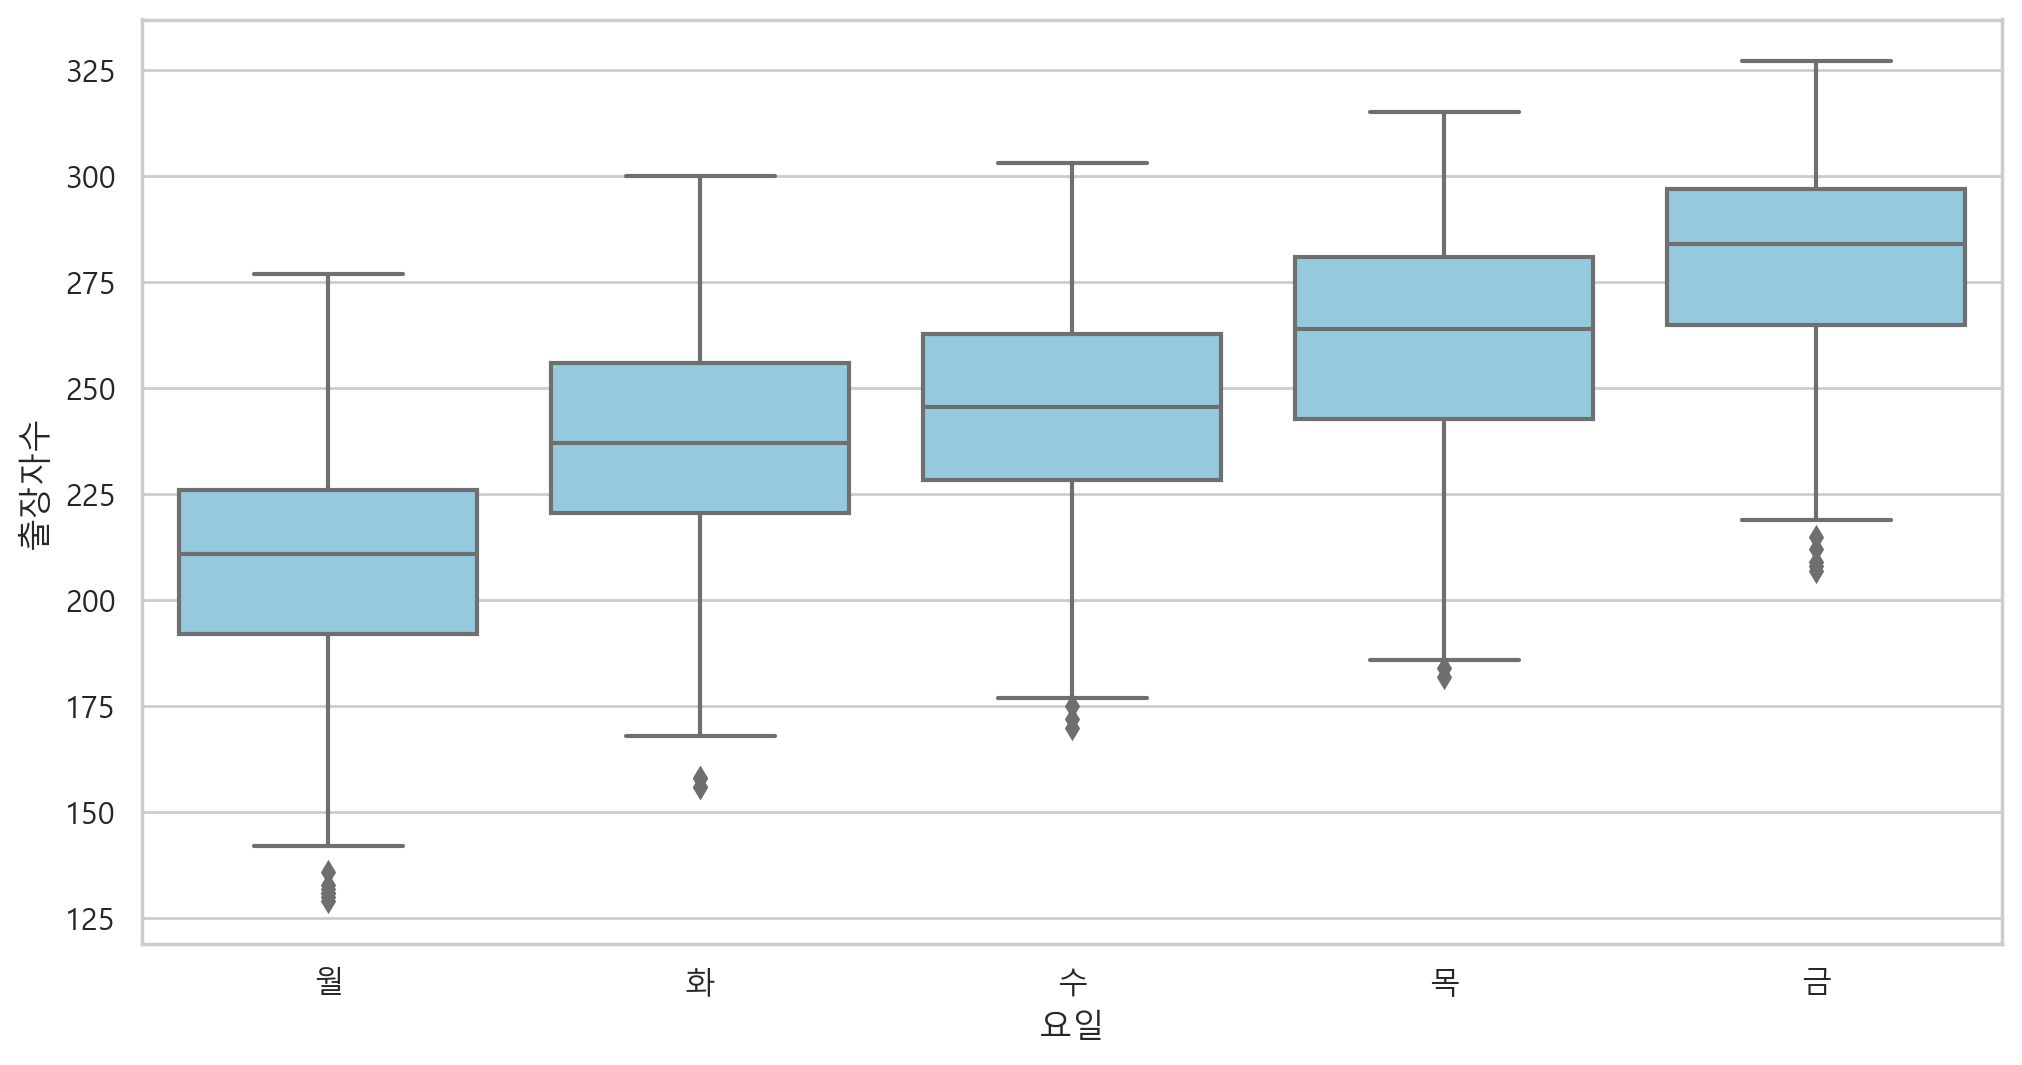

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='요일', y="출장자수", data=train1, color='skyblue')

- 연장근무자수

In [32]:
# 수요일은 연장근무가 거의 0에 육박하였음. 
# 금요일도 연장근무자수가 적은 걸로 봐선 가장 대표적인 요일 특성인듯.

In [33]:
train1[(train1["요일"]=="수") & (train1["연장근무승인건수"]>0)]


,일자,요일,정원,휴가자수,출장자수,연장근무승인건수,본사재택근무자수,조식,중식,석식,중식계,석식계,연,월,일,분기
385,2021-01-13,수,2983,80.00,175.00,8,393.00,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 양송이스프/흑미밥 들깨무채국 매운사태...,쌀밥/흑미밥/찰현미밥 시금치된장국 돈육두루치기 타코야끼 상추쌈 겉절이김치 양상추샐러...,알리오올리오/추가밥 가쓰오장국 수제치킨까스 팽이버섯부추무침 산고추지무침 무생채,913.00,360.00,2021,1,13,1분기
386,2021-01-06,수,2983,85.00,238.22,11,433.00,모닝롤/군대리아 우유/주스 계란후라이/찐계란 브로콜리스프/흑미밥 열무된장국 크래미미...,쌀밥/흑미밥/찰현미밥 오리들깨탕 꽁치한마리레몬구이 파프리카계란말이 아삭이고추된장무침...,흑미밥 고기짬뽕국 해물누룽지탕 멸치마늘종조림 단무지채무침 포기김치,1014.00,377.00,2021,1,6,1분기
391,2021-01-20,수,2983,75.00,198.00,4,391.00,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.00,421.00,2021,1,20,1분기
393,2020-01-22,수,2821,130.00,232.00,5,0.00,모닝롤/크로와상 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 재첩국 딤섬 ...,"불고기비빔밥 (쌀:국내산,소고기:호주) 미역장국 허니버터치킨 (닭:국내산) 모듬묵...",쌀밥/잡곡밥 (쌀:국내산) 된장찌개 주꾸미삼겹살볶음 (삼겹:독일산) 셀프무쌈말이 ...,782.00,354.00,2020,1,22,1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,2020-12-16,수,2990,195.00,187.00,1,359.00,모닝롤/길거리토스트 우유/주스 계란후라이 단호박죽/흑미밥 황태해장국 매콤사태찜 양상...,쌀밥/흑미밥/찰현미밥 (New)돈갈비김치찌개 해물완자전 가자미무조림 시금치나물 겉절...,흑미밥 쇠고기무국 오징어떡볶음 물파래초무침 숙주미나리나물 포기김치,1135.00,450.00,2020,12,16,4분기
535,2019-12-18,수,3111,169.00,283.00,3,0.00,모닝롤/크로와상 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 차돌박이된장찌개...,"콩나물밥 (쌀,돈육:국내산) 미소장국 언양식불고기*양파채 샐러드파스타 가래떡츄...",쌀밥/잡곡밥 (쌀:국내산) 김치국 돈육간장볶음 브로컬리새우전 연근샐러드 열무...,683.00,278.00,2019,12,18,4분기
537,2020-12-02,수,2990,223.00,238.22,5,398.00,모닝롤/에그타르트 우유/주스 계란후라이 잣죽/흑미밥 황태채국 봄동나물 토마토리코타치...,(New)바지락비빔밥 (쌀밥/찰현미밥) 팽이장국 메밀전병 채소프리타타 산고추지무침/...,흑미밥 계란파국 묵은지삼겹살찜 궁중떡볶이 참나물겉절이 깍두기,1188.00,523.00,2020,12,2,4분기
538,2020-12-23,수,2990,402.00,193.00,5,324.00,모닝롤/호떡맥모닝 우유/주스 계란후라이 흑임자죽/흑미밥 맑은버섯국 연근호두조림 콥샐...,쌀밥/흑미밥/찰현미밥 건새우아욱국 (New)국물쪼리닭 (New)파프리카계란전 마파무...,유부초밥 들깨미역국 페퍼로니치즈피자 골뱅이채소무침&실곤약 콩나물굴소스볶음 포기김치,768.00,354.00,2020,12,23,4분기


In [34]:
# 이것도 요일별 평균으로 대체하도록 합시다
def overtime_replace(train1):
    def process_group(group):
        # IQR 계산 (현재 그룹에 대해 수행)
        Q1 = group['연장근무승인건수'].quantile(0.25)
        Q3 = group['연장근무승인건수'].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 기준 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 해당 그룹(월)의 평균값 계산
        mean_value = group['연장근무승인건수'].mean()
        
        # 이상치 탐지 및 대체
        group['연장근무승인건수'] = np.where(
            (group['연장근무승인건수'] < lower_bound) | (group['연장근무승인건수'] > upper_bound),
            mean_value, group['연장근무승인건수']
        )
        return group
    
    # 월별로 그룹화하여 이상치 처리
    train1 = train1.groupby('요일').apply(process_group)
    train1.reset_index(drop=True, inplace=True)
    
    return train1

# 함수 호출하여 이상치 대체
train1 = overtime_replace(train1)
valid1 = overtime_replace(valid1)

C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\4086497987.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\4086497987.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train1 = train1.groupby('요일').apply(process_group)
C:\Users\zezeg\AppData\Local\Temp\ipykernel_20452\4086497987.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a 

### 4. 정규성 & 전처리 파이프라인 적용

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer # for boxcox
from scipy.stats import boxcox

타깃 변수 정규성.

상당히 이쁘다

c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


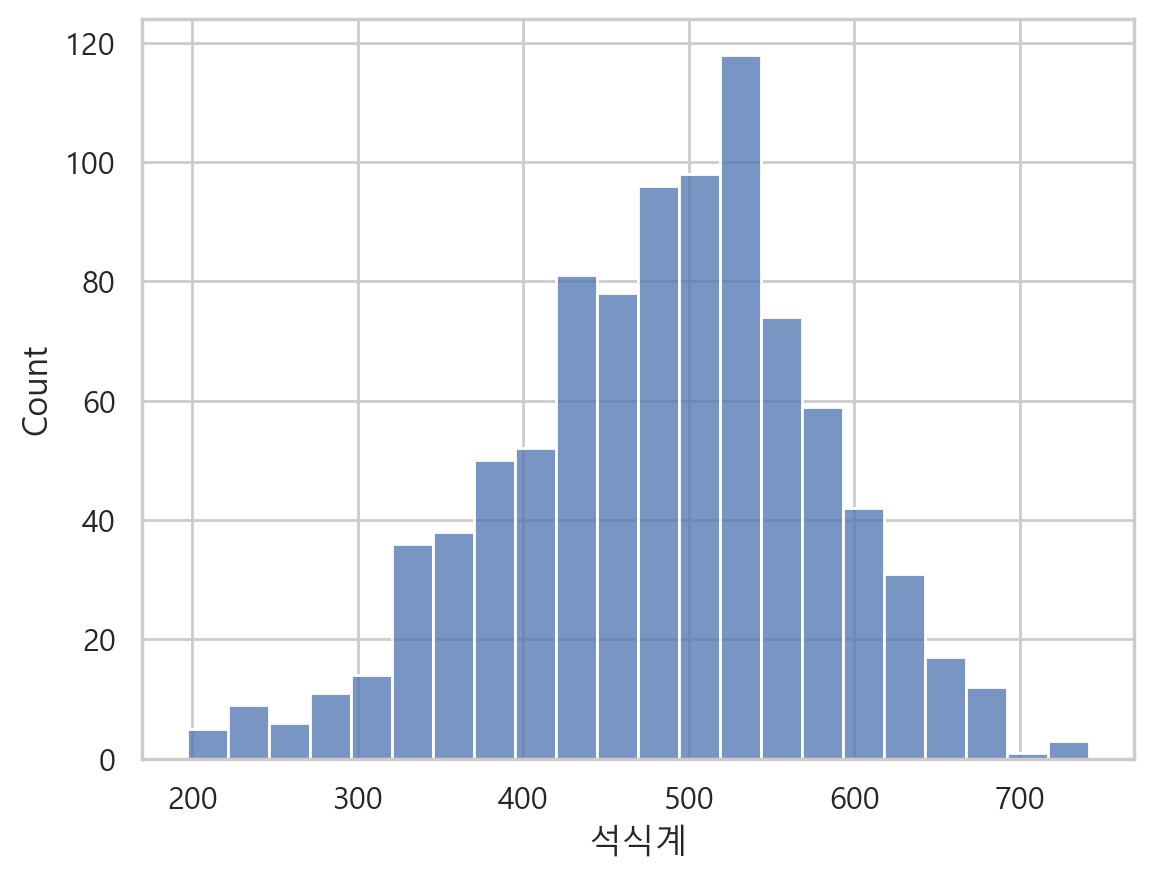

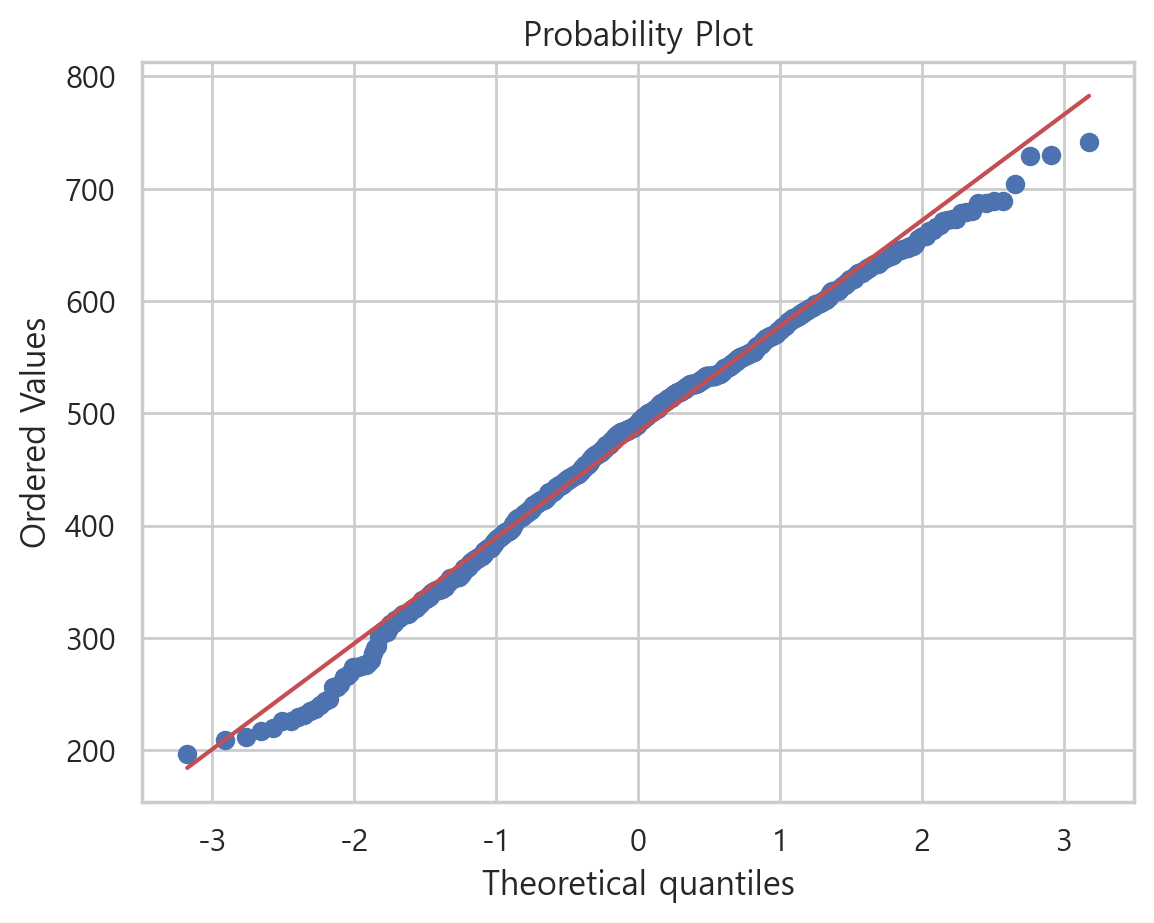

In [36]:
import scipy.stats as stats
sns.histplot(train1['석식계']) #정규성을 띄지 않음.
plt.show()
stats.probplot(train1['석식계'], dist="norm", plot=plt) # Q-Q plot그려보기
plt.show()


<Figure size 1600x1200 with 0 Axes>

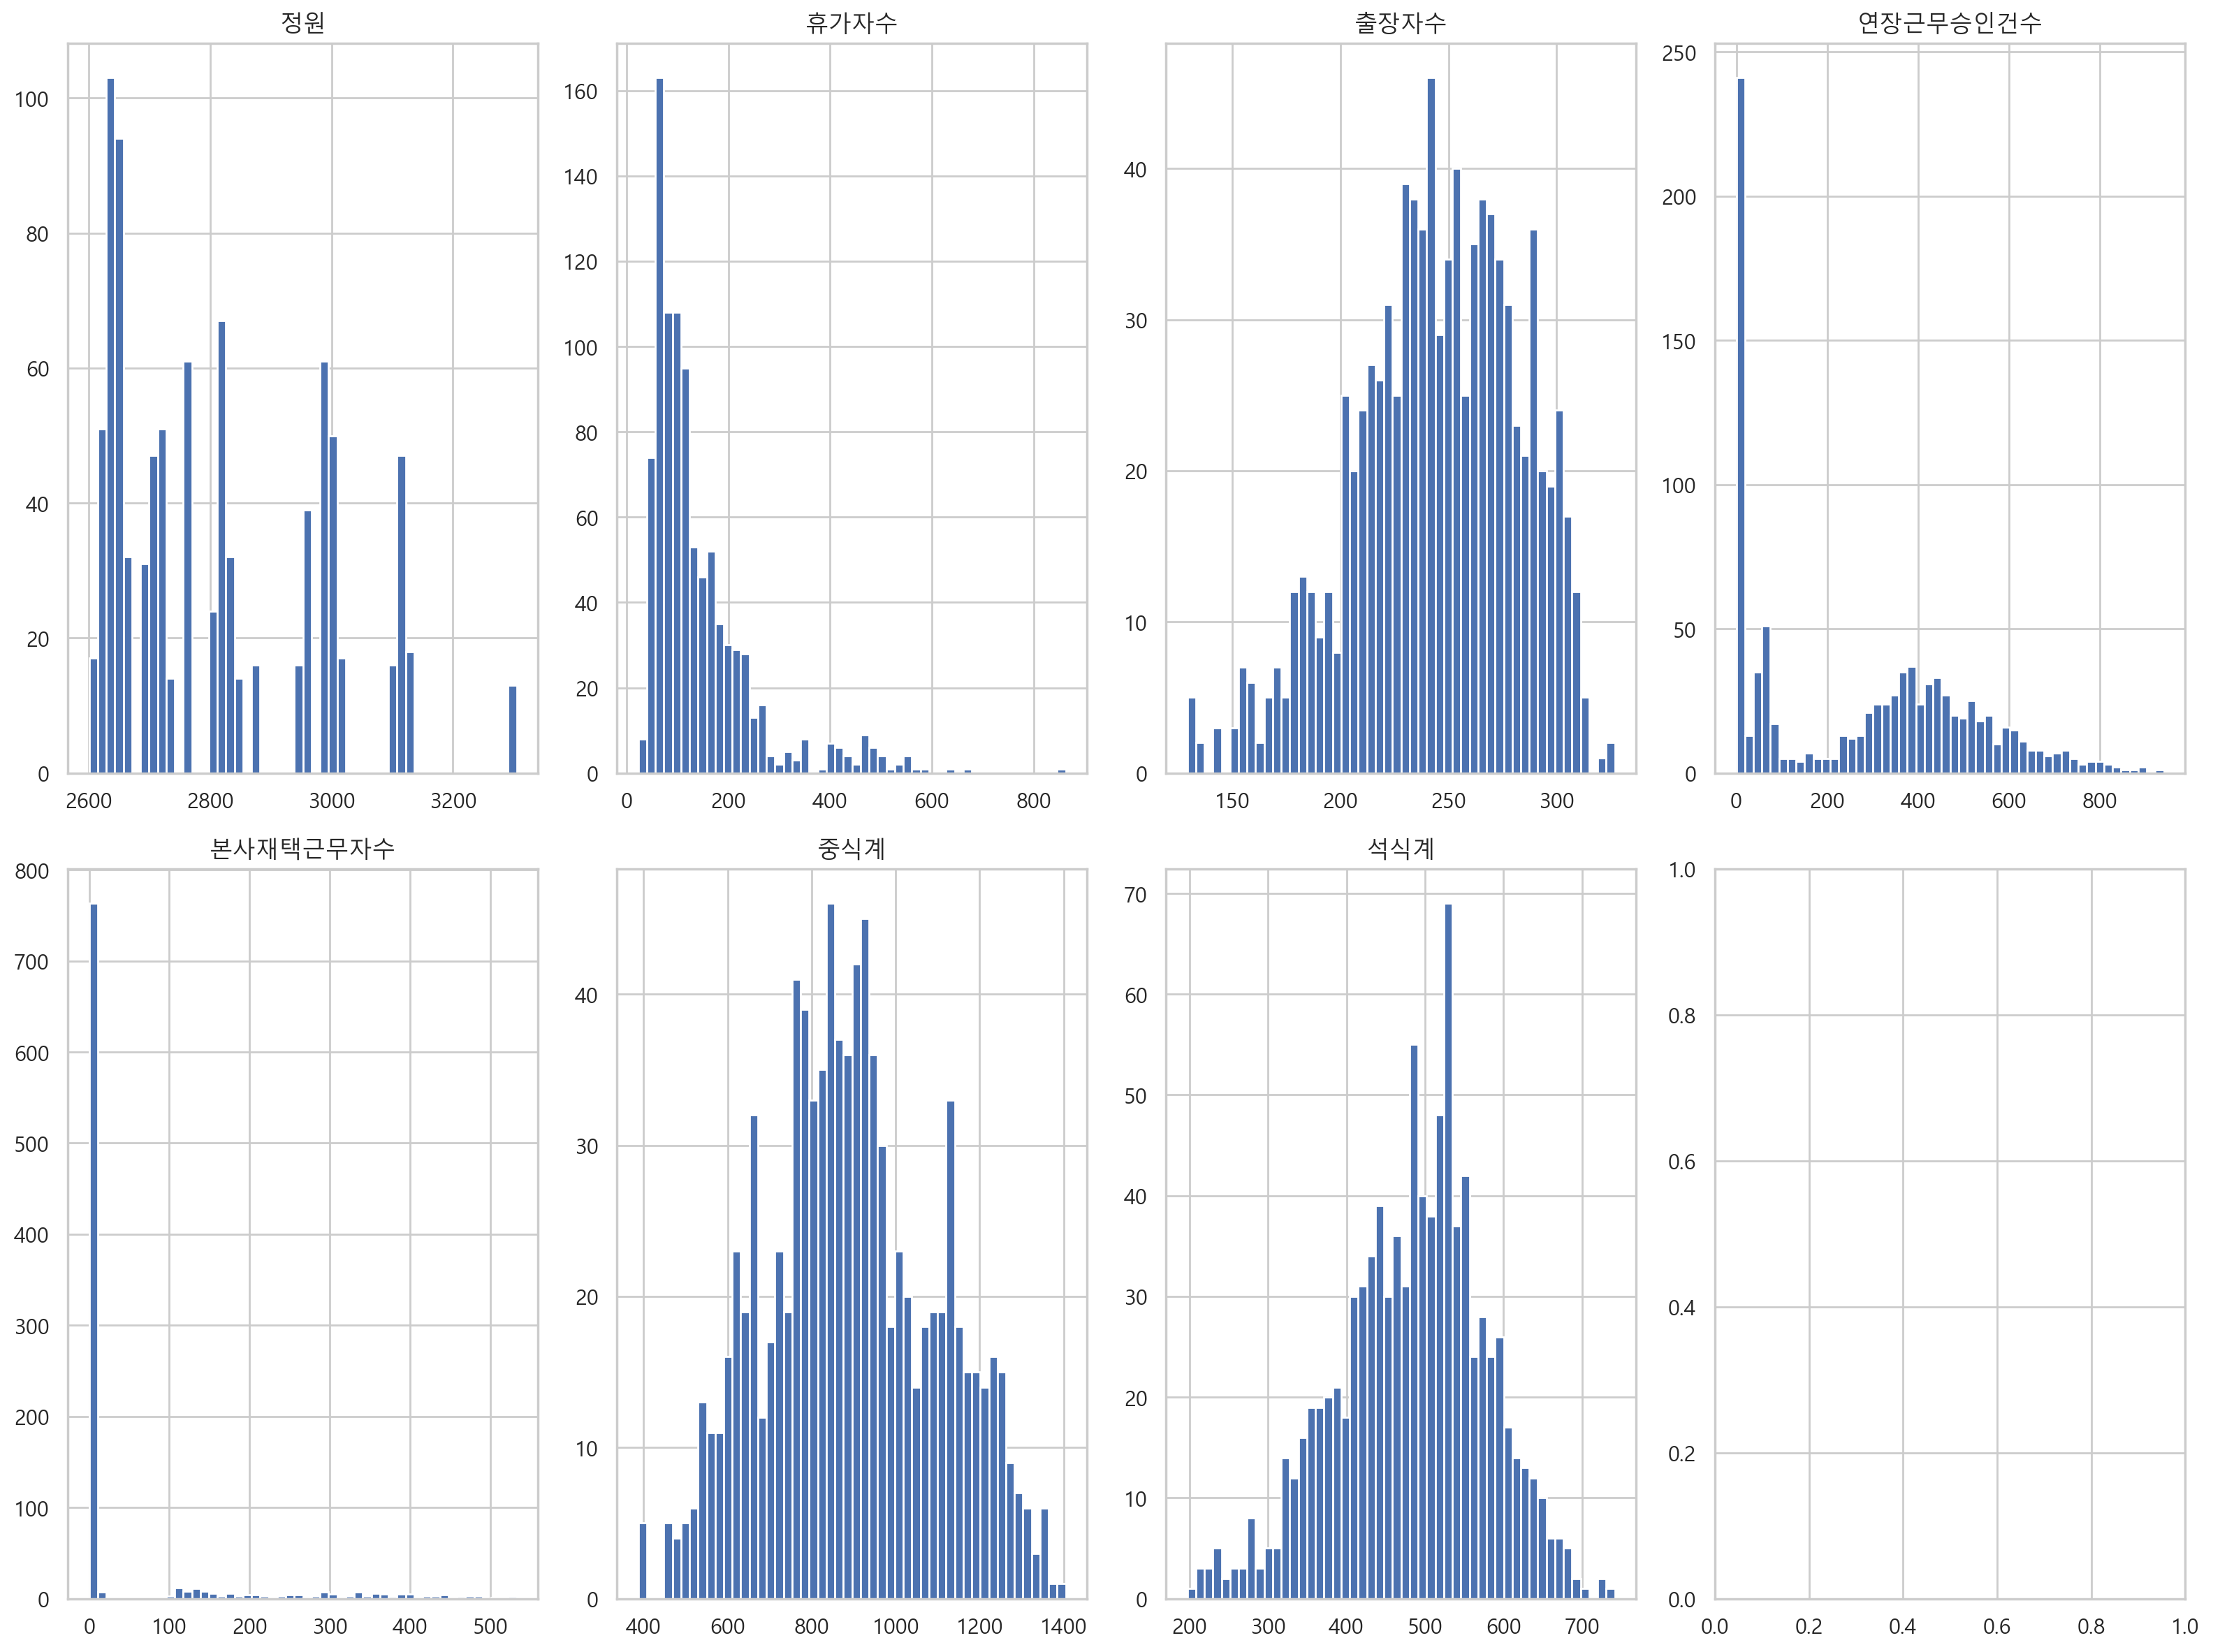

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

columns = train1[["정원", "휴가자수", "출장자수", "연장근무승인건수", "본사재택근무자수", "중식계", "석식계"]]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns):
    train1[column].hist(bins=50, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [38]:
train1.columns

Index(['일자', '요일', '정원', '휴가자수', '출장자수', '연장근무승인건수', '본사재택근무자수', '조식', '중식',
       '석식', '중식계', '석식계', '연', '월', '일', '분기'],
      dtype='object')

In [39]:
train2 = train1.copy()
valid2 = valid1.copy()

# train 
train2_y = train2["석식계"].copy()
valid2_y = valid2["석식계"].copy()

train2 = train2.drop(columns=["석식계", "일자", "월","일","조식","중식","석식"], axis = 1)
valid2 = valid2.drop(columns=["석식계", "일자", "월","일","조식","중식","석식"], axis = 1)

In [40]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# 변환할 피쳐 리스트
cat_at = ["요일", "분기", "연"]
jo_at = ["연장근무승인건수", "본사재택근무자수"]
boxcox_at = ["정원","출장자수","중식계","휴가자수"]

# 범주형 피쳐를 위한 파이프라인 - onehot encode
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(handle_unknown="ignore"))
])

# 박스콕스 변환 파이프라인
boxcox_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("boxcox", PowerTransformer(method="box-cox")),
    ("standardize", StandardScaler())
])

# 로그 변환 파이프라인
john_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("jo", PowerTransformer(method="yeo-johnson")),  
    ("standardize", MinMaxScaler())
])

# 전체 전처리 파이프라인 정의
preprocessing = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, cat_at),
        ("boxcox", boxcox_pipeline, boxcox_at),
        ("jo", john_pipeline, jo_at)
    ]
)

# 데이터 전처리
train22 = preprocessing.fit_transform(train2)

# 변환된 피쳐 이름 생성
cat_feature_names = preprocessing.named_transformers_['cat']['encode'].get_feature_names_out(cat_at)

boxcox_feature_names = boxcox_at


jo_feature_names = jo_at



feature_names = np.concatenate([cat_feature_names, boxcox_feature_names, jo_feature_names])

# 데이터프레임으로 변환
train22 = pd.DataFrame(data=train22, columns=feature_names)


print(train22)


     요일_금  요일_목  요일_수  요일_월  요일_화  분기_1분기  분기_2분기  분기_3분기  분기_4분기  연_2016  \
0    0.00  0.00  0.00  1.00  0.00    1.00    0.00    0.00    0.00    0.00   
1    0.00  0.00  0.00  1.00  0.00    1.00    0.00    0.00    0.00    0.00   
2    0.00  0.00  0.00  1.00  0.00    1.00    0.00    0.00    0.00    0.00   
3    0.00  0.00  0.00  1.00  0.00    1.00    0.00    0.00    0.00    0.00   
..    ...   ...   ...   ...   ...     ...     ...     ...     ...     ...   
927  1.00  0.00  0.00  0.00  0.00    0.00    0.00    0.00    1.00    1.00   
928  1.00  0.00  0.00  0.00  0.00    0.00    0.00    0.00    1.00    1.00   
929  1.00  0.00  0.00  0.00  0.00    0.00    0.00    0.00    1.00    0.00   
930  1.00  0.00  0.00  0.00  0.00    0.00    0.00    0.00    1.00    0.00   

     ...  연_2018  연_2019  연_2020  연_2021   정원  출장자수   중식계  휴가자수  연장근무승인건수  \
0    ...    0.00    0.00    0.00    0.00 0.00 -1.13  1.25 -0.02      0.72   
1    ...    0.00    1.00    0.00    0.00 0.00 -1.11  1.19 -0.27      0.74  

In [41]:

valid22 = preprocessing.transform(valid2)  
cat_feature_names_valid = preprocessing.named_transformers_['cat']['encode'].get_feature_names_out(cat_at)
boxcox_feature_names_valid = boxcox_at
jo_feature_names_valid = jo_at  





feature_names_valid = np.concatenate([cat_feature_names_valid, boxcox_feature_names_valid, jo_feature_names_valid])

# 데이터프레임으로 변환
valid22 = pd.DataFrame(data=valid22, columns=feature_names_valid)

# 변환된 데이터 확인
print(valid22)


     요일_금  요일_목  요일_수  요일_월  요일_화  분기_1분기  분기_2분기  분기_3분기  분기_4분기  연_2016  \
0    1.00  0.00  0.00  0.00  0.00    1.00    0.00    0.00    0.00    0.00   
1    1.00  0.00  0.00  0.00  0.00    1.00    0.00    0.00    0.00    0.00   
2    1.00  0.00  0.00  0.00  0.00    1.00    0.00    0.00    0.00    0.00   
3    1.00  0.00  0.00  0.00  0.00    1.00    0.00    0.00    0.00    0.00   
..    ...   ...   ...   ...   ...     ...     ...     ...     ...     ...   
237  0.00  0.00  0.00  0.00  1.00    0.00    0.00    0.00    1.00    1.00   
238  0.00  0.00  0.00  0.00  1.00    0.00    0.00    0.00    1.00    0.00   
239  0.00  0.00  0.00  0.00  1.00    0.00    0.00    0.00    1.00    1.00   
240  0.00  0.00  0.00  0.00  1.00    0.00    0.00    0.00    1.00    0.00   

     ...  연_2018  연_2019  연_2020  연_2021   정원  출장자수   중식계  휴가자수  연장근무승인건수  \
0    ...    1.00    0.00    0.00    0.00 0.00  0.53 -1.05  0.66      0.32   
1    ...    0.00    0.00    1.00    0.00 0.00  0.41 -1.62  0.06      0.00  

In [42]:
train22.columns

Index(['요일_금', '요일_목', '요일_수', '요일_월', '요일_화', '분기_1분기', '분기_2분기', '분기_3분기',
       '분기_4분기', '연_2016', '연_2017', '연_2018', '연_2019', '연_2020', '연_2021',
       '정원', '출장자수', '중식계', '휴가자수', '연장근무승인건수', '본사재택근무자수'],
      dtype='object')

<Figure size 1600x1200 with 0 Axes>

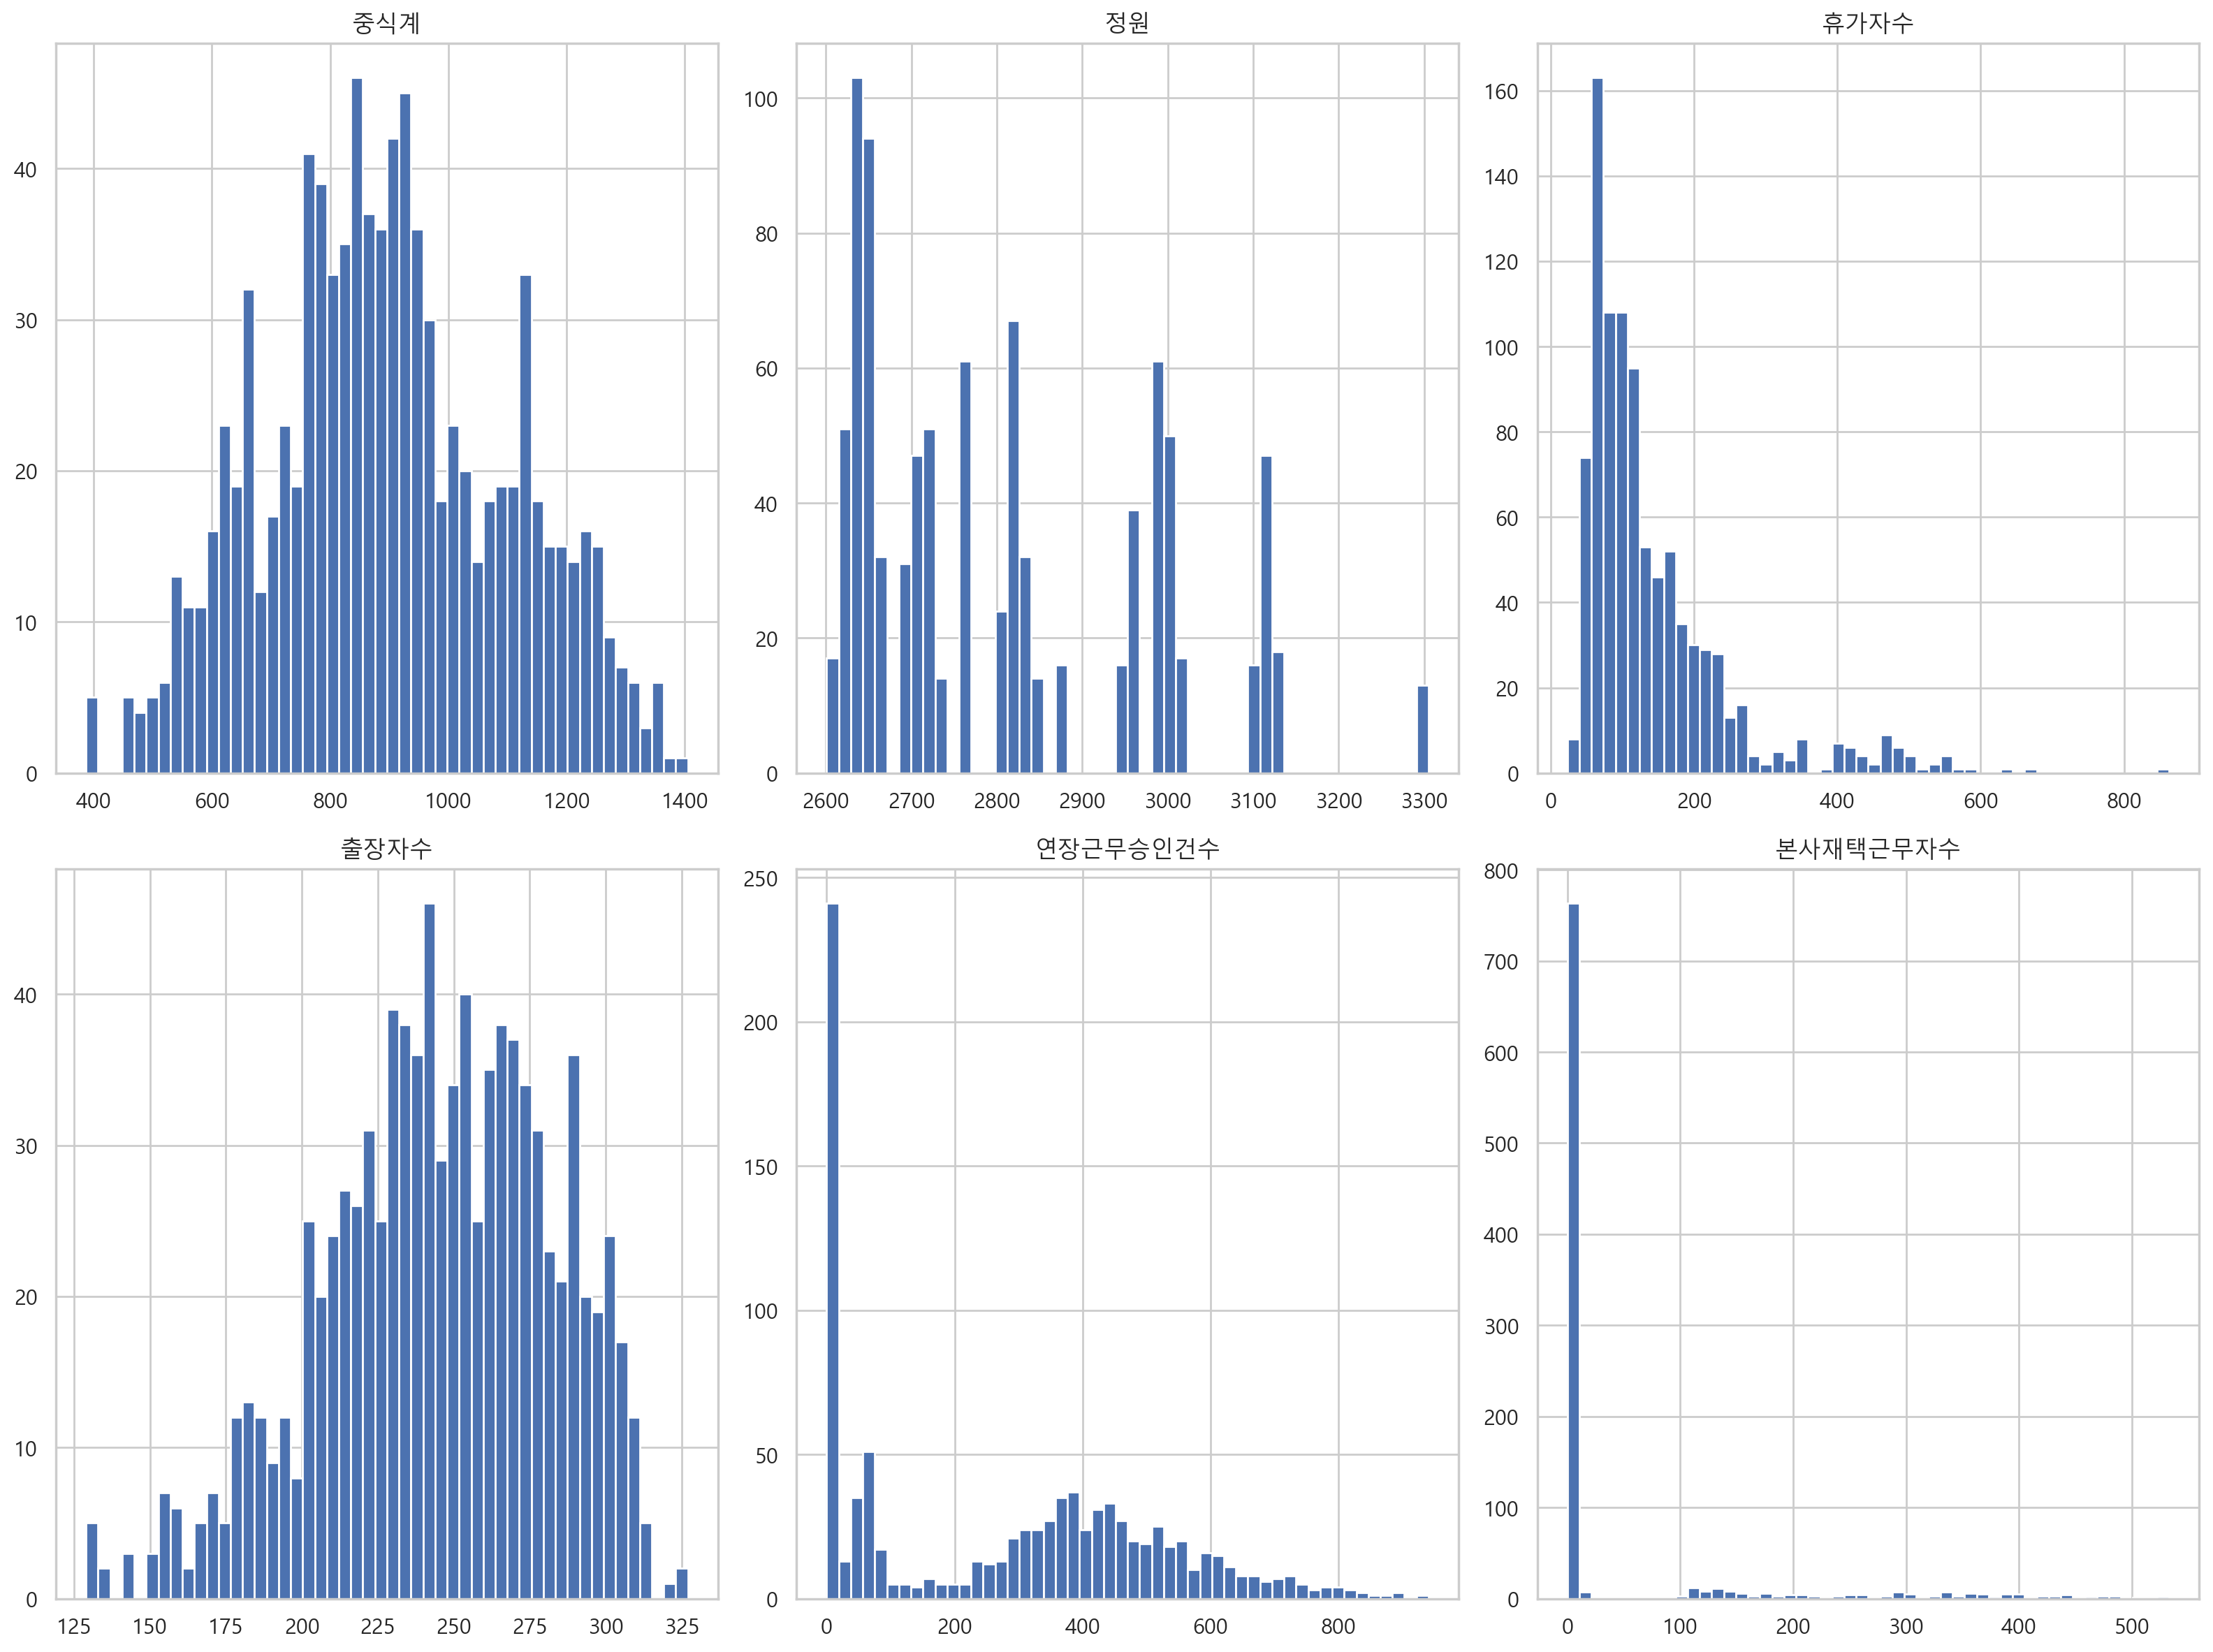

In [43]:
# 파이프라인 거친 최종본.

# but 여기서 더 변환하여 대다수가 0인 패턴이거나, 코로나로 재택근무가 늘어난 패턴을 꺨 필요가 있을까?



plt.figure(figsize=(16, 12))

columns = train22[["중식계","정원","휴가자수","출장자수","연장근무승인건수","본사재택근무자수"]]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns):
    train1[column].hist(bins=50, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
train_x = train22.copy()
train_y = train2_y.copy()

valid_x = valid22.copy()
valid_y = valid2_y.copy()

## 모델링

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
# 모델 초기화
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}

# 모델 학습 및 성능 평가
results = {}
for name, model in models.items():
    # 모델 학습
    model.fit(train_x, train_y)
    
    # 예측
    y_pred = model.predict(valid_x)
    
    # 성능 평가
    mse = mean_squared_error(valid_y, y_pred)
    mae = mean_absolute_error(valid_y, y_pred)
    r2 = r2_score(valid_y, y_pred)
    
    # 결과 저장
    results[name] = {
        "Mean squared Error" : mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    }

# 결과 출력
results_df = pd.DataFrame(results).T.sort_values(by="R^2 Score")
print(results_df)

                              Mean squared Error  Mean Absolute Error  \
Support Vector Regression                5808.84                58.93   
ElasticNet Regression                    4495.48                51.87   
Lasso Regression                         3640.26                44.69   
Linear Regression                        3416.09                43.46   
Ridge Regression                         3410.06                43.33   
Random Forest Regression                 3397.61                42.99   
Gradient Boosting Regression             2908.65                40.21   

                              R^2 Score  
Support Vector Regression          0.27  
ElasticNet Regression              0.43  
Lasso Regression                   0.54  
Linear Regression                  0.57  
Ridge Regression                   0.57  
Random Forest Regression           0.57  
Gradient Boosting Regression       0.63  


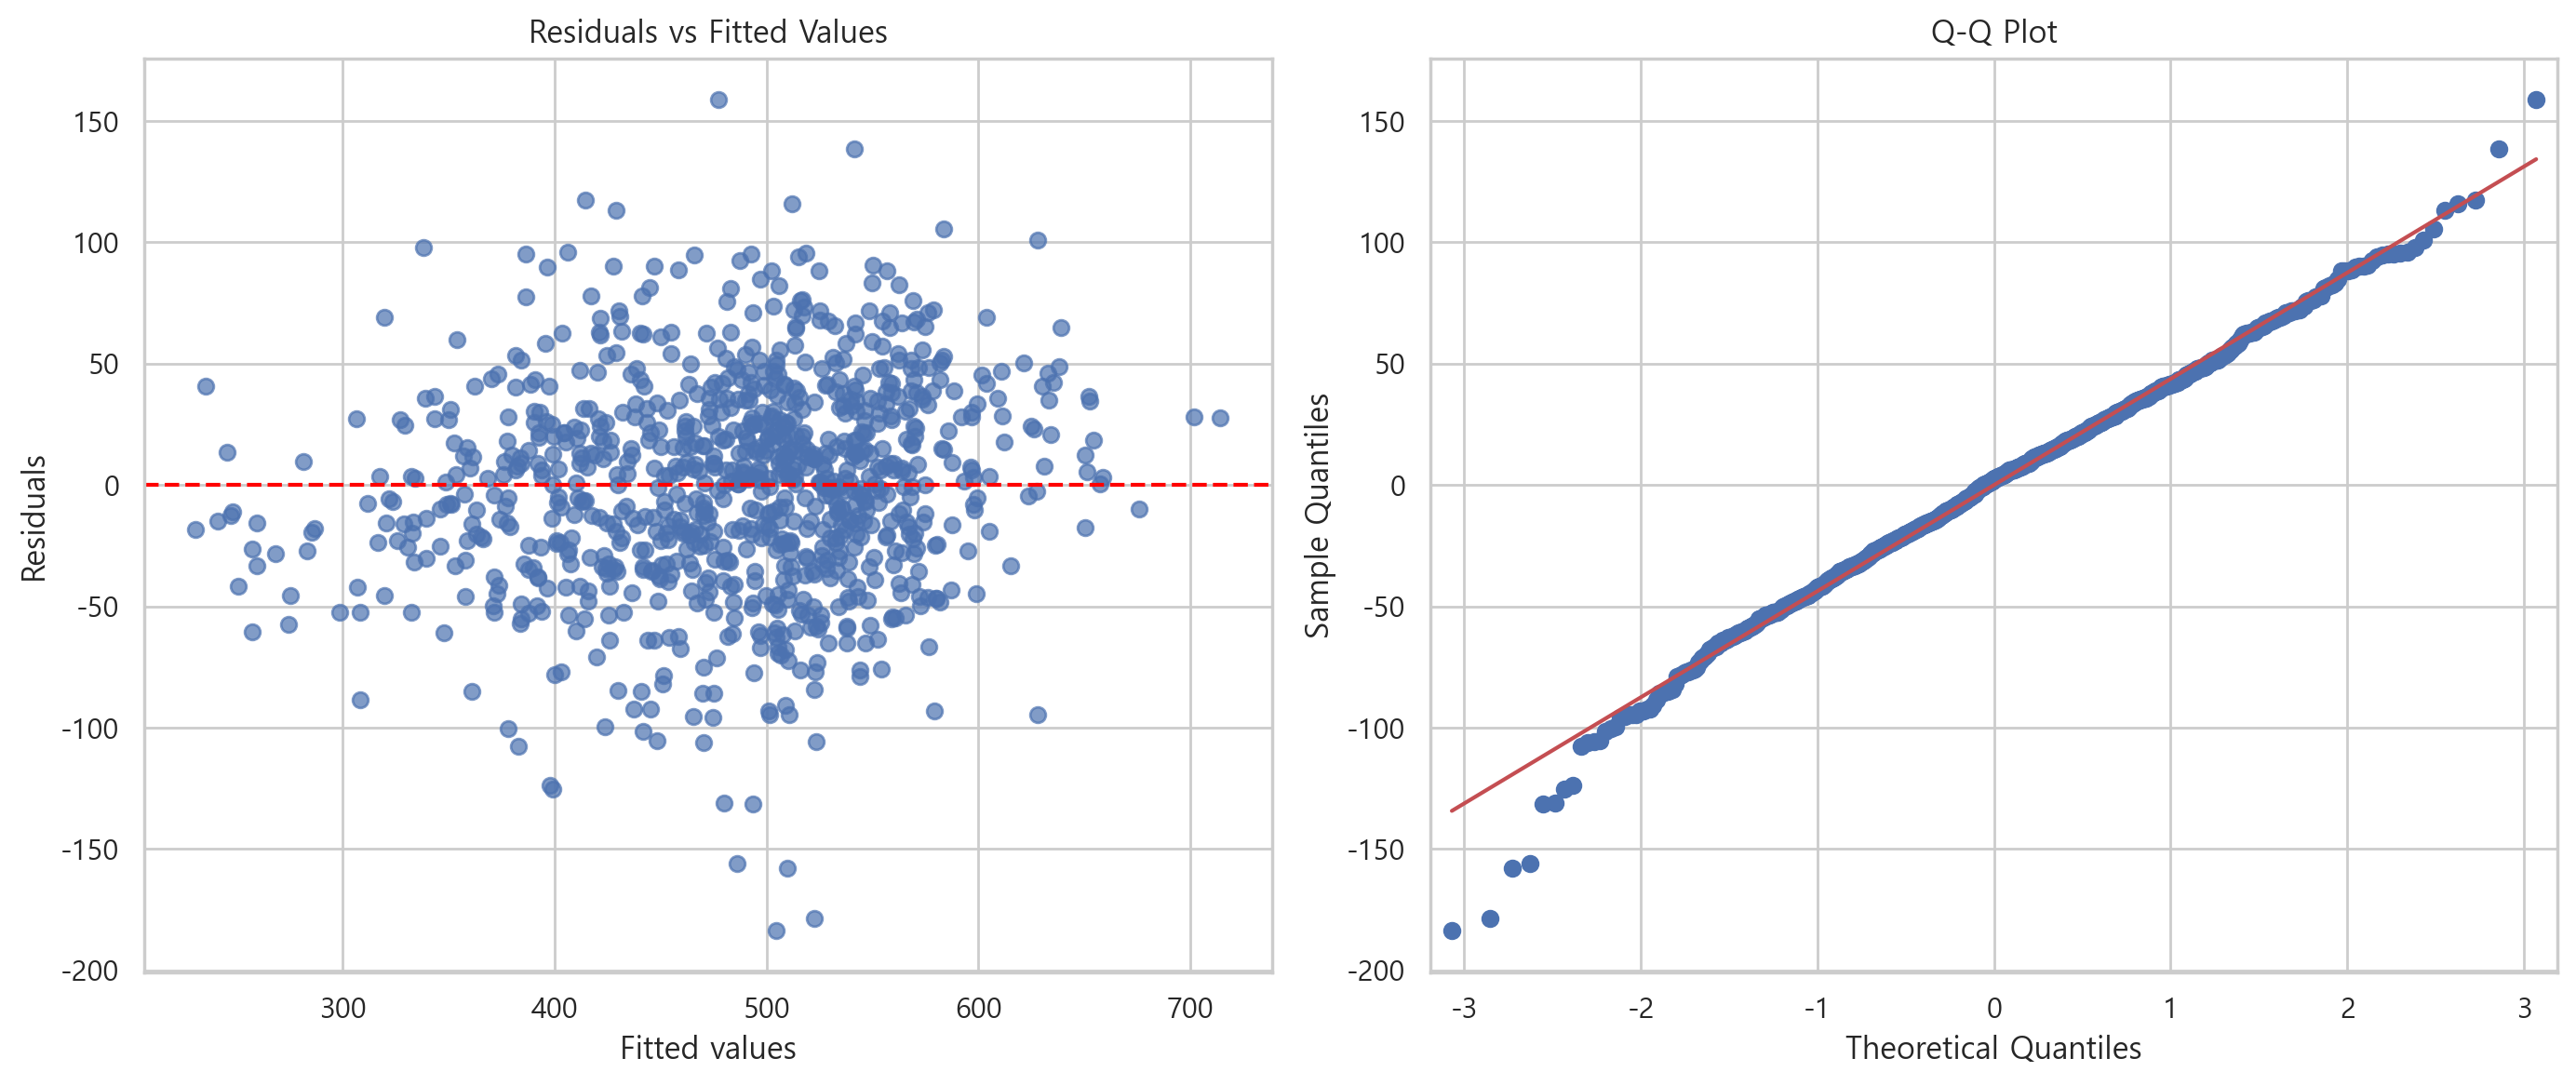

c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


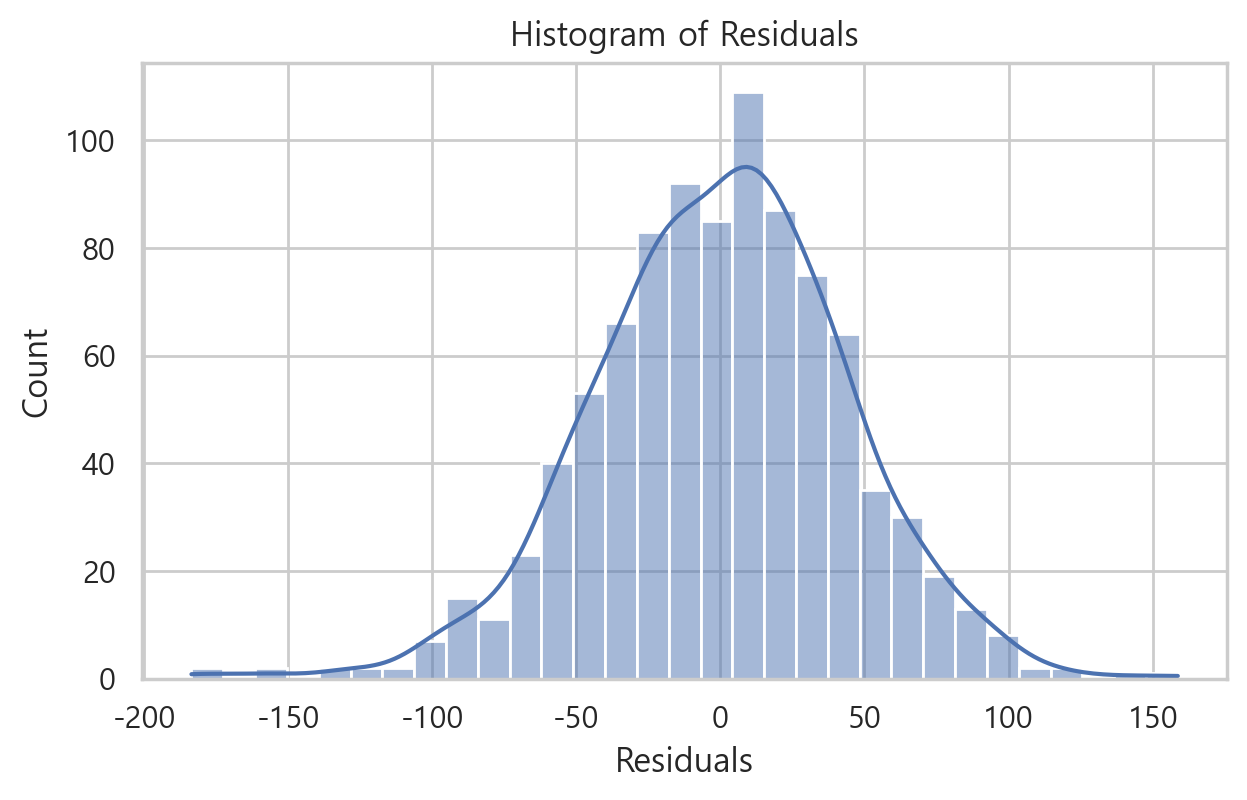

Mean Squared Error: 1913.7348604196234
R-squared: 0.784648228451114


In [47]:
gbr = GradientBoostingRegressor()
gbr.fit(train_x, train_y)

# 예측
y_pred = gbr.predict(train_x)

# 잔차 계산
residuals = train_y - y_pred

# 잔차 분석
plt.figure(figsize=(14, 6))

# 잔차 플롯 (잔차 vs 예측값)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Q-Q 플롯 (잔차의 정규성 확인)
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 히스토그램 (잔차의 분포 확인)
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(train_y, y_pred)
r2 = r2_score(train_y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

에러 많이난 곳 분석

In [69]:
error = train2.loc[residuals[(residuals>100) | (residuals<-100)].index]
error["answer"] = train2_y[residuals[(residuals>100) | (residuals<-100)].index]
error["y_pred"] = y_pred[residuals[(residuals>100) | (residuals<-100)].index]

,요일,정원,휴가자수,출장자수,연장근무승인건수,본사재택근무자수,중식계,연,분기,answer,y_pred
25,월,2601,121.76,168.00,110.00,0.00,1137.66,2016,1분기,344.00,522.58
117,월,2644,115.00,159.00,458.00,0.00,1266.00,2016,3분기,729.00,628.14
208,화,2697,61.00,158.00,259.00,0.00,1041.00,2017,1분기,364.00,470.26
210,화,2655,60.00,216.00,433.00,0.00,1054.00,2018,1분기,689.00,583.65
...,...,...,...,...,...,...,...,...,...,...,...
760,금,2806,121.76,273.55,3.00,0.00,653.90,2019,1분기,532.00,414.67
769,금,2836,130.00,300.00,4.00,0.00,663.00,2019,1분기,542.00,428.97
881,금,2645,63.00,268.00,86.00,0.00,653.90,2017,4분기,628.00,512.01
926,금,2705,228.14,273.55,3.00,0.00,658.00,2016,4분기,275.00,382.72


In [71]:
train2.describe()

,정원,휴가자수,출장자수,연장근무승인건수,본사재택근무자수,중식계,연
count,931.00,931.00,931.00,931.00,931.00,931.00,931.00
mean,2808.17,141.83,244.51,279.92,45.73,893.57,2018.07
std,169.98,105.05,38.01,239.66,112.01,204.03,1.45
min,2601.00,23.00,129.00,0.00,0.00,387.00,2016.00
25%,2645.00,72.00,220.50,4.00,0.00,761.00,2017.00
50%,2760.00,107.00,246.00,310.00,0.00,881.00,2018.00
75%,2962.00,172.50,273.00,462.00,0.00,1033.00,2019.00
max,3305.00,863.00,327.00,941.00,533.00,1405.00,2021.00


In [70]:
error.describe()

,정원,휴가자수,출장자수,연장근무승인건수,본사재택근무자수,중식계,연,answer,y_pred
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,2739.90,115.91,240.48,193.84,0.00,860.75,2017.38,431.43,477.34
std,142.98,57.27,41.32,198.06,0.00,170.95,1.36,155.89,65.31
min,2601.00,46.00,158.00,0.00,0.00,653.90,2016.00,274.00,378.22
25%,2655.00,63.00,216.00,3.00,0.00,711.00,2016.00,330.00,428.97
50%,2697.00,121.76,255.03,110.00,0.00,845.00,2017.00,352.00,480.03
75%,2806.00,150.00,273.00,375.98,0.00,928.12,2019.00,542.00,512.01
max,3111.00,242.00,300.00,591.00,0.00,1266.00,2020.00,729.00,628.14


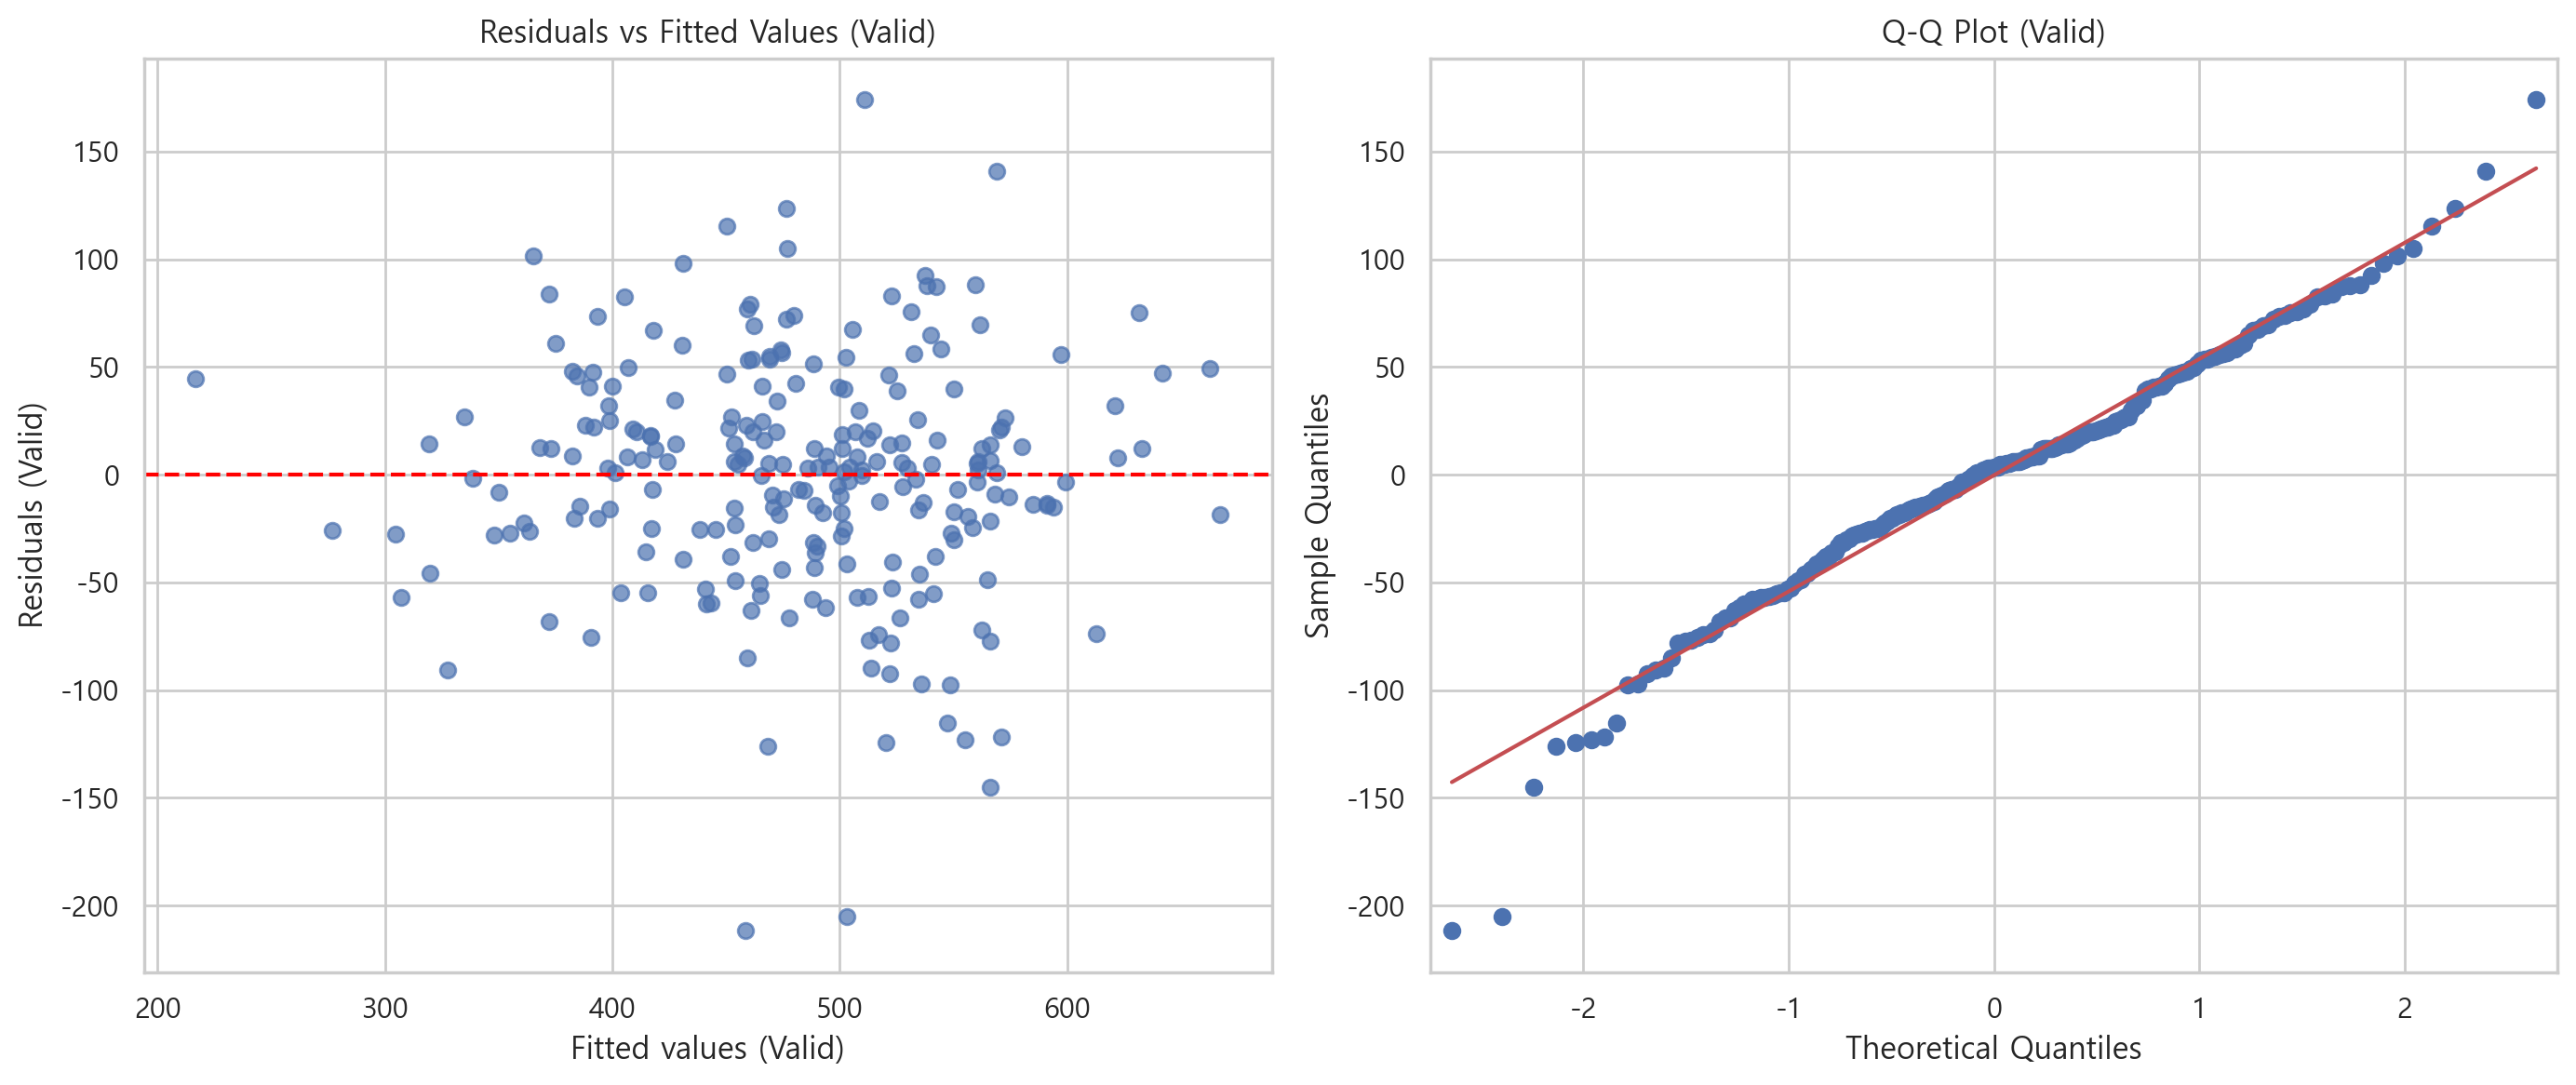

c:\Users\zezeg\.conda\envs\datavisual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


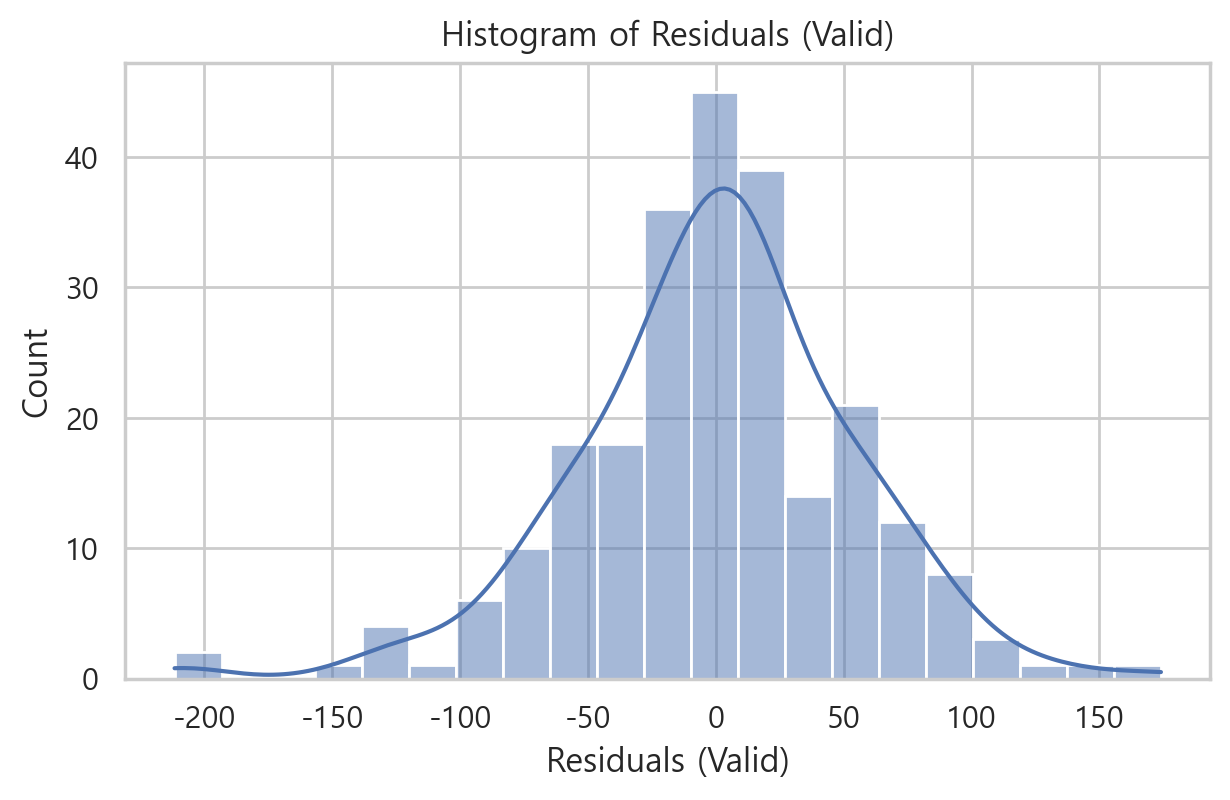

Mean Squared Error: 2910.0669723255965
R-squared: 0.6339886294228154


In [ ]:
# Valid set 예측
valid_y_pred = gbr.predict(valid_x)

# Valid set 잔차 계산
valid_residuals = valid_y - valid_y_pred


# Valid set 잔차 분석
plt.figure(figsize=(14, 6))

# Valid set 잔차 플롯
plt.subplot(1, 2, 1)
plt.scatter(valid_y_pred, valid_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (Valid)')
plt.ylabel('Residuals (Valid)')
plt.title('Residuals vs Fitted Values (Valid)')

# Valid set Q-Q 플롯
plt.subplot(1, 2, 2)
sm.qqplot(valid_residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot (Valid)')

plt.tight_layout()
plt.show()

# Valid set 잔차 히스토그램
plt.figure(figsize=(7, 4))
sns.histplot(valid_residuals, kde=True)
plt.xlabel('Residuals (Valid)')
plt.title('Histogram of Residuals (Valid)')
plt.show()

mse = mean_squared_error(valid_y, valid_y_pred)
r2 = r2_score(valid_y, valid_y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
